# EDA on Employee Retention - Aditya - GCD - Capstone

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Probing Questions](#section4)<br>
5. [Feature Engineering](#section5)<br>


<a id = section1></a>

## 1. Project Goals

Your client for this project is the HR Department at a software company.

    They want to try a new initiative to retain employees.
    The idea is to use data to predict whether an employee is likely to leave.
    Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
    They only want to deal with the data that is related to permanent employees.

Current Practice
Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

This suffers from the following problems:

    This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
    The second problem is these insights can't be aggregated and interlaced across all employees who have left.
    The third is that it is too late by the time the proposed policy changes take effect.


The HR department has hired you as data science consultants. They want to supplement their exit interviews with a more proactive approach.


### Your Role

    You are given datasets of past employees and their status (still employed or already left).
    Your task is to build a classification model using the datasets.
    Because there was no machine learning model for this problem in the company, you don’t have quantifiable win condition. You need to build the best possible model.


#### Problem Specifics
    Deliverable: Predict whether an employee will stay or leave.
    Machine learning task: Classification
    Target variable: Status (Employed/Left)
    Win condition: N/A (best possible model)

<a id = section2></a>

## 2. Data Description

The Business Intelligence Analysts of the Company provided you three datasets that contain information about past employees and their status (still employed or already left).

    department_data

    This dataset contains information about each department. The schema of the dataset is as follows:
        dept_id – Unique Department Code
        dept_name – Name of the Department
        dept_head – Name of the Head of the Department

    employee_details_data

    This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:
        employee_id – Unique ID Number for each employee
        age – Age of the employee
        gender – Gender of the employee
        marital_status – Marital Status of the employee

    employee_data

    This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

    Target variable
        status – Current employment status (Employed / Left)

    Administrative information
        department – Department to which the employees belong(ed) to
        salary – Salary level with respect to rest of their department
        tenure – Number of years at the company
        recently_promoted – Was the employee promoted in the last 3 years?
        employee_id – Unique ID Number for each employee

    Workload information
        n_projects – Number of projects employee has worked on
        avg_monthly_hrs – Average number of hours worked per month

    Mutual evaluation information
        satisfaction – Score for employee’s satisfaction with the company (higher is better)
        last_evaluation – Score for most recent evaluation of employee (higher is better)
        filed_complaint – Has the employee filed a formal complaint in the last 3 years?


<a id = section3></a>

## 3. EDA

#### Data Source
Download the DataSets onto Python by connecting to the below provided MySQL instance.
                      
    host        'projects.insaid.co'
    user 	   'student'
    passwd      'student'
    database    'Capstone2'

In [2]:
# Database 
import mysql.connector
from mysql.connector import Error
from collections import Counter

# ML
import pandas as pd
import numpy as np

# sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Plotting
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
tables = ['department_data', 'employee_details_data', 'employee_data']

In [4]:
try:
    mySQLconnection = mysql.connector.connect(host='cpanel.insaid.co',#host='projects.insaid.co',
                             database='Capstone2',
                             user='student',
                             password='student')
    
    if mySQLconnection.is_connected():
        db_Info = mySQLconnection.get_server_info()
        print("Connected to MySQL database... MySQL Server version on ",db_Info)
        cursor = mySQLconnection.cursor()
        cursor.execute("select database();")
        database = cursor.fetchone()
        print ("Your connected to - ", database)
        # for table in tables:
            # cursor.execute(sql_select_Query)
            # records = cursor.fetchall()
            # print (records)
        sql_select_Query = "select * from department_data"
        SQL_Query = pd.read_sql_query(sql_select_Query, mySQLconnection)
        df_departmentData = pd.DataFrame(SQL_Query)
        print(df_departmentData.head(3))
        
        sql_select_Query = "select * from employee_details_data"
        SQL_Query = pd.read_sql_query(sql_select_Query, mySQLconnection)
        df_employeeDetailsData = pd.DataFrame(SQL_Query)
        print(df_employeeDetailsData.head(3))

        sql_select_Query = "select * from employee_data"
        SQL_Query = pd.read_sql_query(sql_select_Query, mySQLconnection)
        df_employeeData = pd.DataFrame(SQL_Query)
        print(df_employeeData.head(3))
except Error as e :
    print ("Error while connecting to MySQL", e)
finally:
    #closing database connection.
    if(mySQLconnection .is_connected()):
        mySQLconnection.close()
        print("MySQL connection is closed")

Connected to MySQL database... MySQL Server version on  5.6.44-cll-lve
Your connected to -  ('Capstone2',)
  dept_id dept_name        dept_head
0  D00-IT        IT       Henry Adey
1  D00-SS     Sales  Edward J Bayley
2  D00-TP      Temp  Micheal Zachrey
   employee_id  age  gender marital_status
0       113558   43    Male        Married
1       112256   24  Female      Unmarried
2       112586   22  Female      Unmarried
   avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0       None              NaN         0.866838           6   
1            134.0       None              NaN         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   

   recently_promoted  salary  satisfaction status  tenure  employee_id  
0                NaN  medium      0.134415   Left     4.0       124467  
1                NaN     low      0.511041   Left     3.0       112210  
2                NaN  medium      0.4

In [5]:
df_departmentData.to_csv('department_data_sql.csv')
df_employeeDetailsData.to_csv('employee_details_data_sql.csv')
df_employeeData.to_csv('employee_data_sql.csv')
print (df_departmentData.shape)
print (df_employeeDetailsData.shape)
print (df_employeeData.shape)

(11, 3)
(14245, 4)
(14150, 11)


In [6]:
df_departmentData['dept_id'].unique()

array(['D00-IT', 'D00-SS', 'D00-TP', 'D00-ENG', 'D00-SP', 'D00-FN',
       'D00-PR', 'D00-AD', 'D00-MN', 'D00-MT', 'D00-PD'], dtype=object)

In [7]:
df_employeeData['department'].unique()

array([None, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN', '-IT'],
      dtype=object)

In [8]:
# Replace Incorrect Data
df_employeeData['department'].replace({'-IT': 'D00-IT'}, inplace=True)

In [9]:
df_employeeData['department'].unique()

array([None, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN'], dtype=object)

In [10]:
df_employeeDetailsData['age'].isna().unique()

array([False])

In [11]:
df_empData = pd.merge(df_employeeData, df_employeeDetailsData, how='left', on="employee_id")

In [12]:
print (df_empData.head())
print (df_empData.shape)

   avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0       None              NaN         0.866838           6   
1            134.0       None              NaN         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              NaN         0.961360           6   
4            146.0     D00-SS              NaN         0.507349           2   

   recently_promoted  salary  satisfaction status  tenure  employee_id   age  \
0                NaN  medium      0.134415   Left     4.0       124467  42.0   
1                NaN     low      0.511041   Left     3.0       112210  23.0   
2                NaN  medium      0.405101   Left     3.0       126150  24.0   
3                NaN     low      0.152974   Left     4.0       125346  51.0   
4                NaN  medium      0.434845   Left     3.0       113707  23.0   

   gender marital_status  
0  Female        

In [13]:
df_empData['age'].isna().unique()

array([False,  True])

In [14]:
df = pd.merge(df_empData, df_departmentData, how='left', left_on='department', right_on='dept_id')
#df = df_empData.copy()

In [15]:
print (df.head())
print (df.shape)

   avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0       None              NaN         0.866838           6   
1            134.0       None              NaN         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              NaN         0.961360           6   
4            146.0     D00-SS              NaN         0.507349           2   

   recently_promoted  salary  satisfaction status  tenure  employee_id   age  \
0                NaN  medium      0.134415   Left     4.0       124467  42.0   
1                NaN     low      0.511041   Left     3.0       112210  23.0   
2                NaN  medium      0.405101   Left     3.0       126150  24.0   
3                NaN     low      0.152974   Left     4.0       125346  51.0   
4                NaN  medium      0.434845   Left     3.0       113707  23.0   

   gender marital_status dept_id dept_name  

In [16]:
df = df.drop('department', 1)

In [17]:
df.to_csv('Employee_original_data.csv')
print (df.head())
print (df.shape)

   avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
0            246.0              NaN         0.866838           6   
1            134.0              NaN         0.555718           2   
2            156.0              1.0         0.474082           2   
3            256.0              NaN         0.961360           6   
4            146.0              NaN         0.507349           2   

   recently_promoted  salary  satisfaction status  tenure  employee_id   age  \
0                NaN  medium      0.134415   Left     4.0       124467  42.0   
1                NaN     low      0.511041   Left     3.0       112210  23.0   
2                NaN  medium      0.405101   Left     3.0       126150  24.0   
3                NaN     low      0.152974   Left     4.0       125346  51.0   
4                NaN  medium      0.434845   Left     3.0       113707  23.0   

   gender marital_status dept_id dept_name        dept_head  
0  Female        Married     NaN       NaN      

### Data Pre-processing and Cleaning

In [18]:
df.columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure',
       'employee_id', 'age', 'gender', 'marital_status', 'dept_id',
       'dept_name', 'dept_head'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14150 entries, 0 to 14149
Data columns (total 16 columns):
avg_monthly_hrs      14150 non-null float64
filed_complaint      2046 non-null float64
last_evaluation      12663 non-null float64
n_projects           14150 non-null int64
recently_promoted    297 non-null float64
salary               14150 non-null object
satisfaction         14000 non-null float64
status               14150 non-null object
tenure               14000 non-null float64
employee_id          14150 non-null int64
age                  14145 non-null float64
gender               14145 non-null object
marital_status       14145 non-null object
dept_id              13443 non-null object
dept_name            13443 non-null object
dept_head            13443 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 1.8+ MB


In [20]:
df.describe(include='all')

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
count,14150.000000,2046.0,12663.000000,14150.000000,297.0,14150,14000.000000,14150,14000.000000,14150.000000,14145.000000,14145,14145,13443,13443,13443
unique,NaN,NaN,NaN,NaN,NaN,3,NaN,2,NaN,NaN,NaN,2,2,11,11,11
top,NaN,NaN,NaN,NaN,NaN,low,NaN,Employed,NaN,NaN,NaN,Male,Unmarried,D00-SS,Sales,Edward J Bayley
freq,NaN,NaN,NaN,NaN,NaN,6906,NaN,10784,NaN,NaN,NaN,9304,7226,3905,3905,3905
mean,199.994346,1.0,0.718399,3.778304,1.0,NaN,0.621212,NaN,3.499357,112080.750247,32.898621,NaN,NaN,NaN,NaN,NaN
std,50.833697,0.0,0.173108,1.250162,0.0,NaN,0.250482,NaN,1.462584,8748.202856,9.978939,NaN,NaN,NaN,NaN,NaN
min,49.000000,1.0,0.316175,1.000000,1.0,NaN,0.040058,NaN,2.000000,0.000000,22.000000,NaN,NaN,NaN,NaN,NaN
25%,155.000000,1.0,0.563711,3.000000,1.0,NaN,0.450356,NaN,3.000000,105772.500000,24.000000,NaN,NaN,NaN,NaN,NaN
50%,199.000000,1.0,0.724731,4.000000,1.0,NaN,0.652394,NaN,3.000000,111291.500000,29.000000,NaN,NaN,NaN,NaN,NaN
75%,245.000000,1.0,0.871409,5.000000,1.0,NaN,0.824925,NaN,4.000000,116650.750000,41.000000,NaN,NaN,NaN,NaN,NaN


In [21]:
df.isnull().sum()[df.isnull().sum() !=0]

filed_complaint      12104
last_evaluation       1487
recently_promoted    13853
satisfaction           150
tenure                 150
age                      5
gender                   5
marital_status           5
dept_id                707
dept_name              707
dept_head              707
dtype: int64

In [22]:
df.shape

(14150, 16)

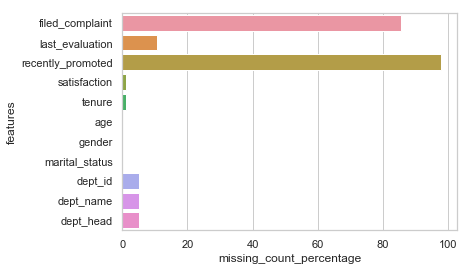

In [23]:
missing = df.isnull().sum()[df.isnull().sum() !=0]
missing = pd.DataFrame(missing.reset_index())
missing.rename(columns={'index':'features',0:'missing_count'}, inplace = True)
missing['missing_count_percentage'] = ((missing['missing_count'])/df.shape[0])*100
plt.figure()
sns.barplot(y = missing['features'], x = missing['missing_count_percentage'])

In [24]:
# Drop the two columns with large number of missing elements
df.drop(['filed_complaint','recently_promoted'], axis=1, inplace = True)

In [25]:
df[df.employee_id < 0]

,avg_monthly_hrs,last_evaluation,n_projects,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head


In [26]:
# Drop records with missing elements
df.dropna(subset=['age', 'gender', 'marital_status', 'avg_monthly_hrs', 'last_evaluation', 'n_projects', 'salary', 'satisfaction', 'tenure', 'dept_id', 'dept_name', 'dept_head'], inplace = True)

In [27]:
df.isnull().sum()[df.isnull().sum() !=0]

Series([], dtype: int64)

In [28]:
df[df.employee_id < 0]

,avg_monthly_hrs,last_evaluation,n_projects,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head


In [29]:
# Drop Records with Invalid Employee ID
df = df[df.employee_id > 0]

In [30]:
# Check for duplicates
df[df.duplicated()].count()

avg_monthly_hrs    29
last_evaluation    29
n_projects         29
salary             29
satisfaction       29
status             29
tenure             29
employee_id        29
age                29
gender             29
marital_status     29
dept_id            29
dept_name          29
dept_head          29
dtype: int64

In [31]:
# Drop Duplicates
df.drop_duplicates(inplace = True) 

In [32]:
CATEGORICAL_COLUMNS = ["gender", "marital_status", "salary", "status"]

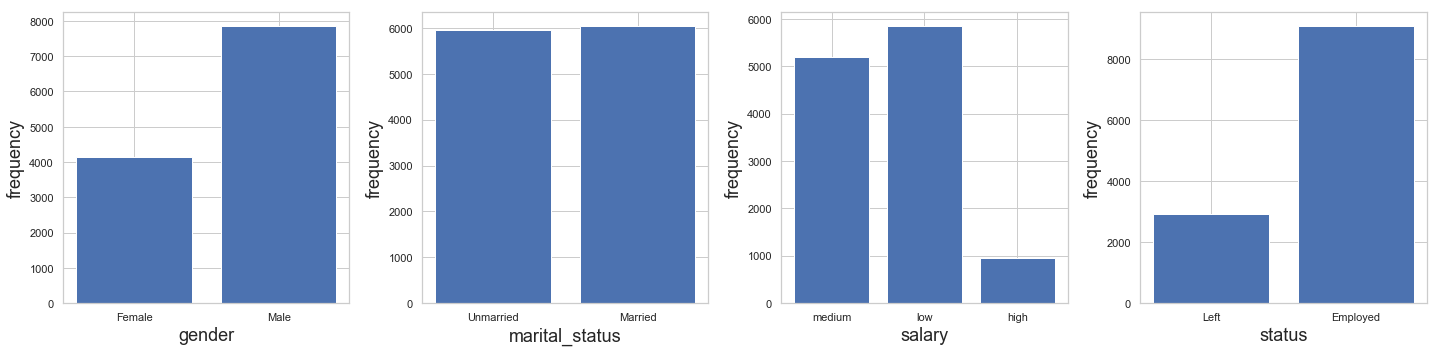

In [33]:
def plot_categoricals(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        cnt = Counter(data[col])
        keys = list(cnt.keys())
        vals = list(cnt.values())
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.bar(range(len(keys)), vals, align="center")
        plt.xticks(range(len(keys)), keys)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_categoricals(df[CATEGORICAL_COLUMNS])

In [34]:
CONTINUOUS_COLUMNS = ["age", "avg_monthly_hrs", "last_evaluation", "n_projects", "satisfaction", "tenure"]

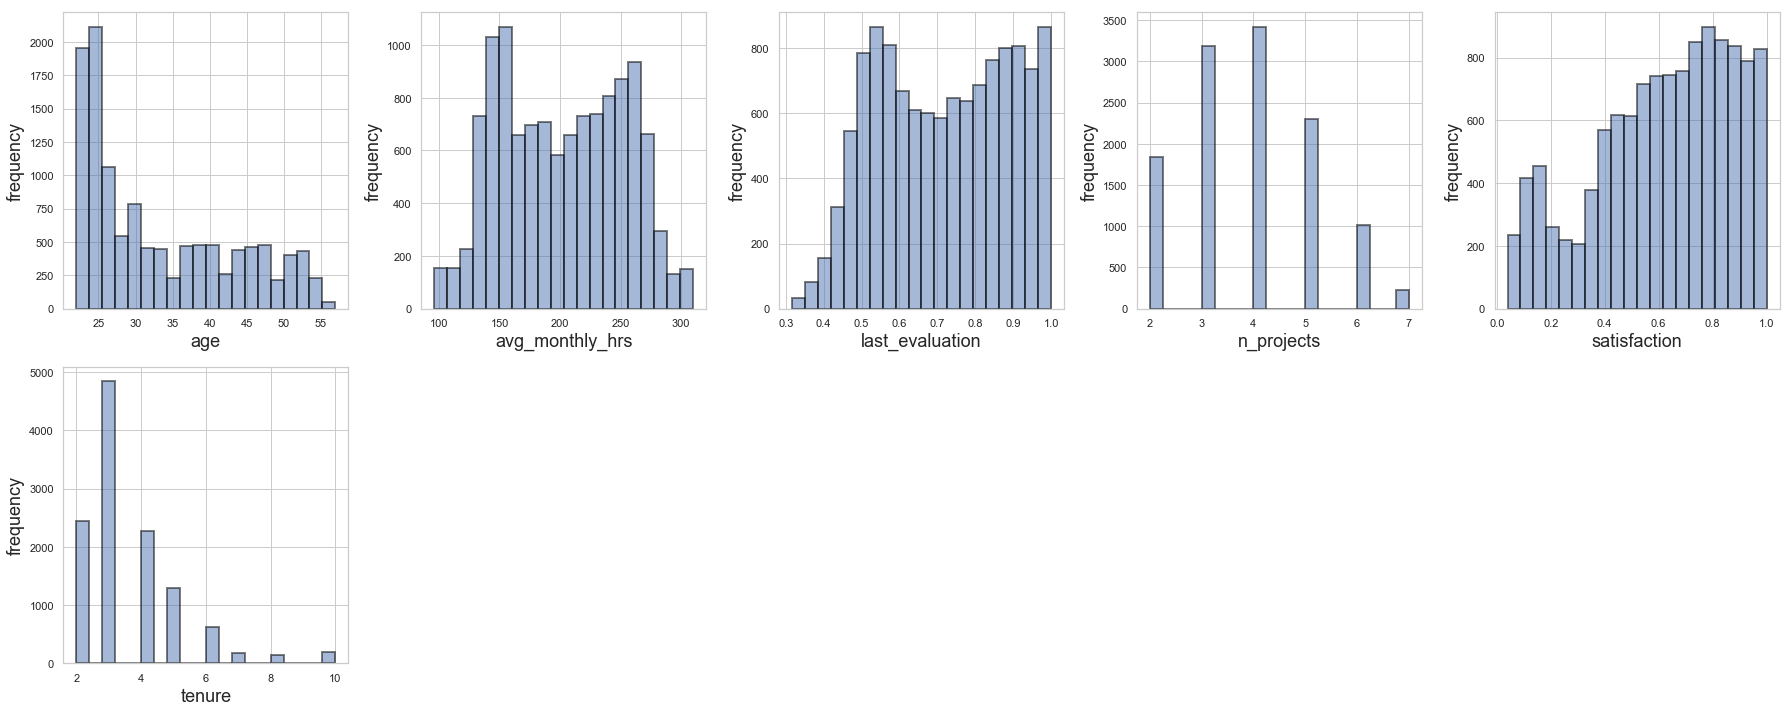

In [35]:
def plot_histgrams(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        X = data[col].dropna()
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.hist(X, bins=20, alpha=0.5, \
                 edgecolor="black", linewidth=2.0)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_histgrams(df[CONTINUOUS_COLUMNS])

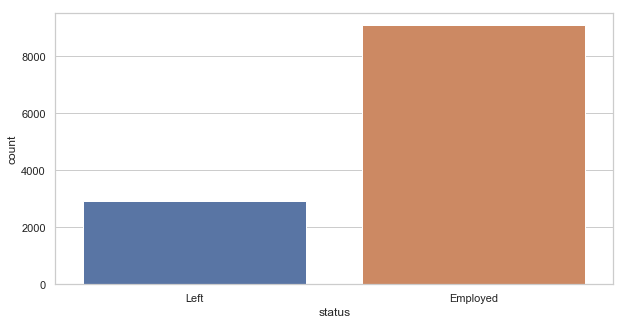

In [36]:
axis1 = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x='status',data=df)

Employed    9067
Left        2922
Name: status, dtype: int64


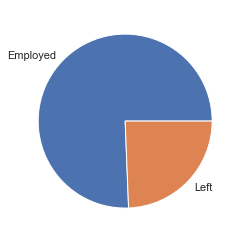

In [37]:
# Getting the count of people
leftcounts=df['status'].value_counts()
print(leftcounts)

# Using matplotlib pie chart and label the pie chart
plt.pie(leftcounts,labels=['Employed','Left']);

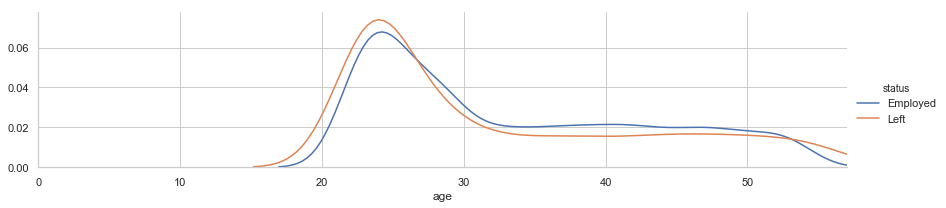

In [38]:
facet = sns.FacetGrid(df, hue="status",aspect=4, hue_order=['Employed', 'Left'])
facet.map(sns.kdeplot,'age')
facet.set(xlim=(0, df['age'].max()))
facet.add_legend()

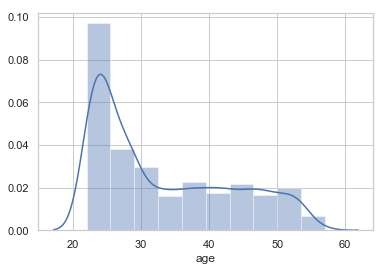

In [39]:
sns.distplot(df["age"],bins=10,kde=True)

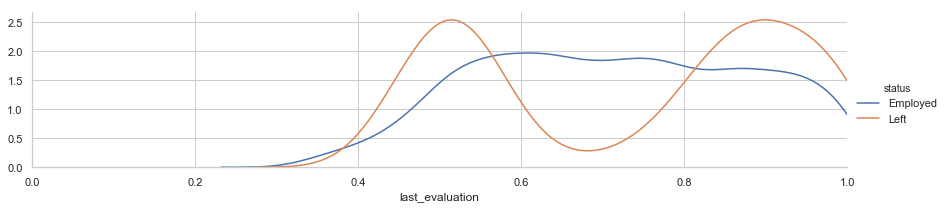

In [40]:
facet = sns.FacetGrid(df, hue="status",aspect=4, hue_order=['Employed', 'Left'])
facet.map(sns.kdeplot,'last_evaluation')
facet.set(xlim=(0, df['last_evaluation'].max()))
facet.add_legend()

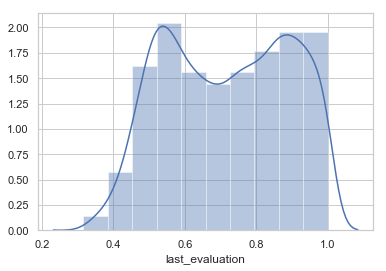

In [41]:
sns.distplot(df["last_evaluation"],bins=10,kde=True)

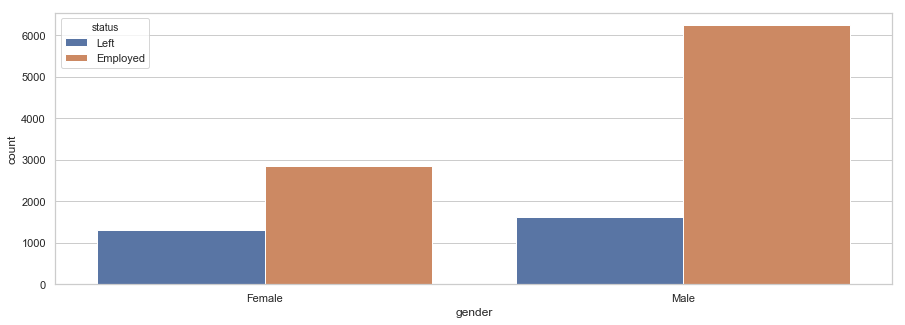

In [42]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='gender', hue="status", data=df, ax=axis1)

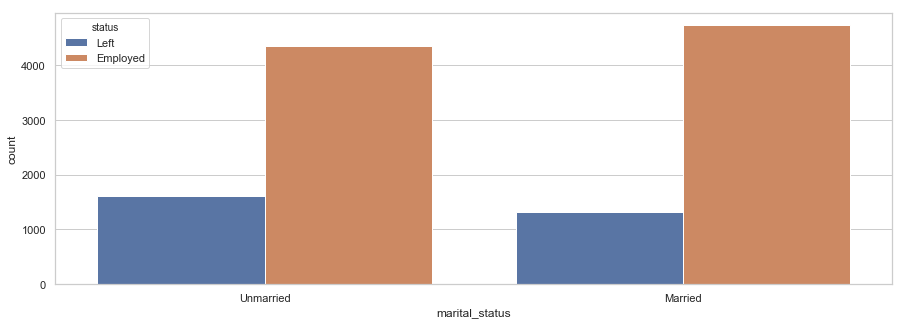

In [43]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='marital_status', hue="status", data=df, ax=axis1)

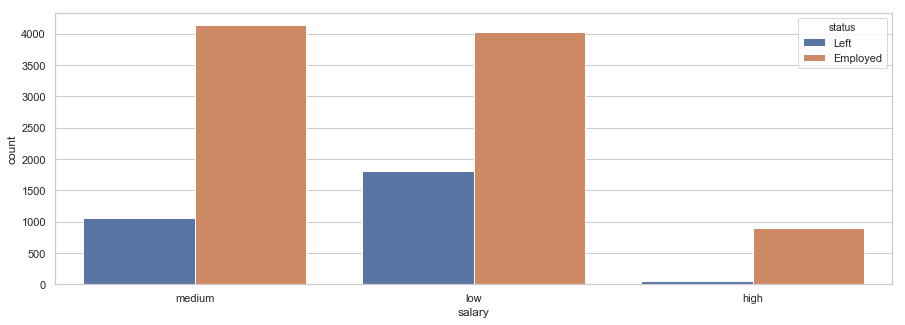

In [44]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='salary', hue="status", data=df, ax=axis1)

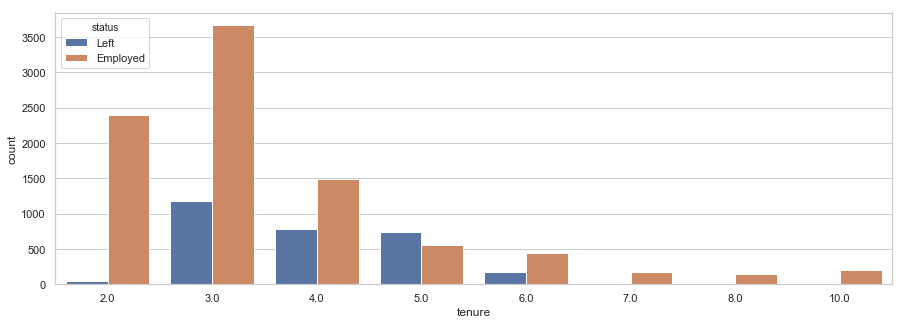

In [45]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='tenure', hue="status", data=df, ax=axis1)

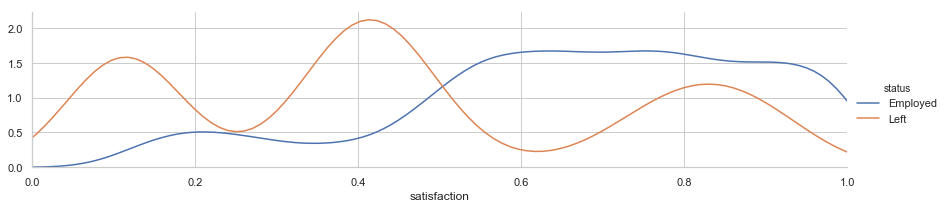

In [46]:
facet = sns.FacetGrid(df, hue="status",aspect=4, hue_order=['Employed', 'Left'])
facet.map(sns.kdeplot,'satisfaction')
facet.set(xlim=(0, df['satisfaction'].max()))
facet.add_legend()

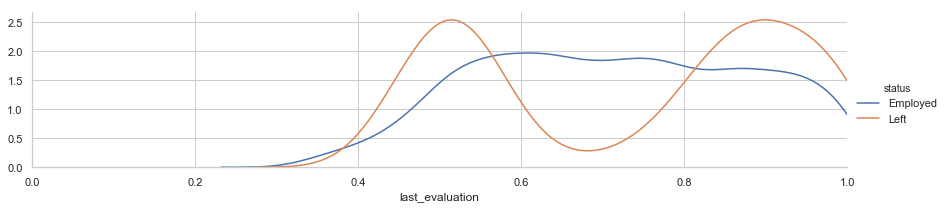

In [47]:
facet = sns.FacetGrid(df, hue="status",aspect=4, hue_order=['Employed', 'Left'])
facet.map(sns.kdeplot,'last_evaluation')
facet.set(xlim=(0, df['last_evaluation'].max()))
facet.add_legend()

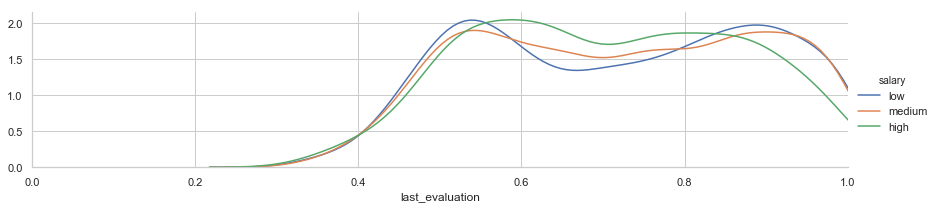

In [48]:
facet = sns.FacetGrid(df, hue="salary",aspect=4, hue_order=['low', 'medium', 'high'])
facet.map(sns.kdeplot,'last_evaluation')
facet.set(xlim=(0, df['last_evaluation'].max()))
facet.add_legend()

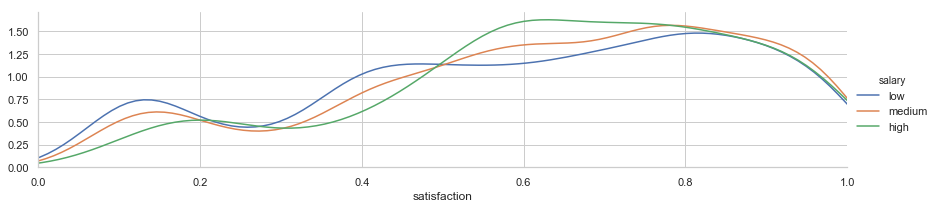

In [49]:
facet = sns.FacetGrid(df, hue="salary",aspect=4, hue_order=['low', 'medium', 'high'])
facet.map(sns.kdeplot,'satisfaction')
facet.set(xlim=(0, df['satisfaction'].max()))
facet.add_legend()

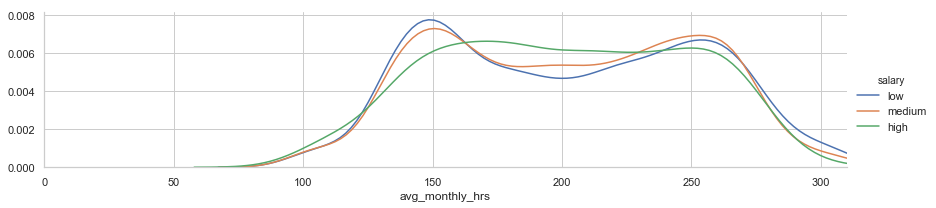

In [50]:
facet = sns.FacetGrid(df, hue="salary",aspect=4, hue_order=['low', 'medium', 'high'])
facet.map(sns.kdeplot,'avg_monthly_hrs')
facet.set(xlim=(0, df['avg_monthly_hrs'].max()))
facet.add_legend()

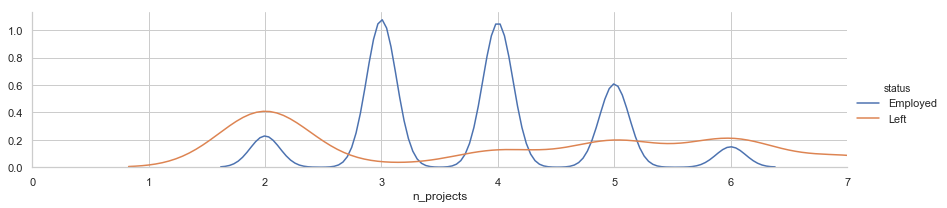

In [51]:
facet = sns.FacetGrid(df, hue="status",aspect=4, hue_order=['Employed', 'Left'])
facet.map(sns.kdeplot,'n_projects')
facet.set(xlim=(0, df['n_projects'].max()))
facet.add_legend()

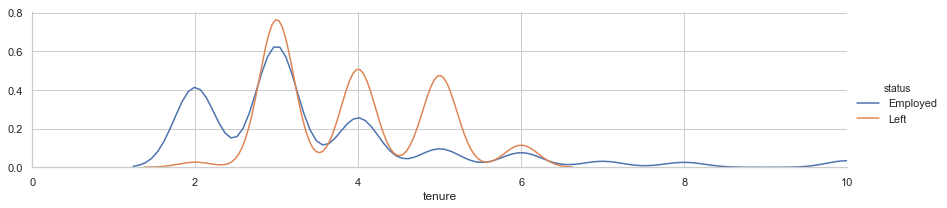

In [52]:
facet = sns.FacetGrid(df, hue="status",aspect=4, hue_order=['Employed', 'Left'])
facet.map(sns.kdeplot,'tenure')
facet.set(xlim=(0, df['tenure'].max()))
facet.add_legend()

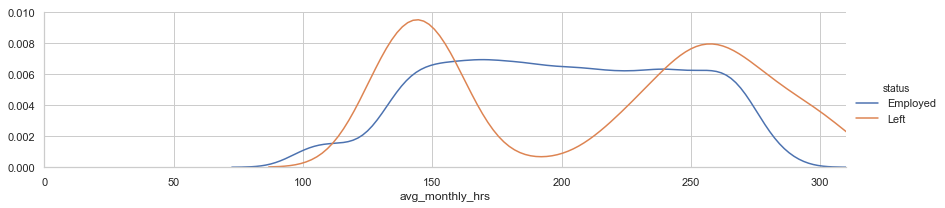

In [53]:
facet = sns.FacetGrid(df, hue="status",aspect=4, hue_order=['Employed', 'Left'])
facet.map(sns.kdeplot,'avg_monthly_hrs')
facet.set(xlim=(0, df['avg_monthly_hrs'].max()))
facet.add_legend()

In [54]:
left_df = df[(df['status'] == 'Left')]
employed_df = df[(df['status'] != 'Left')]

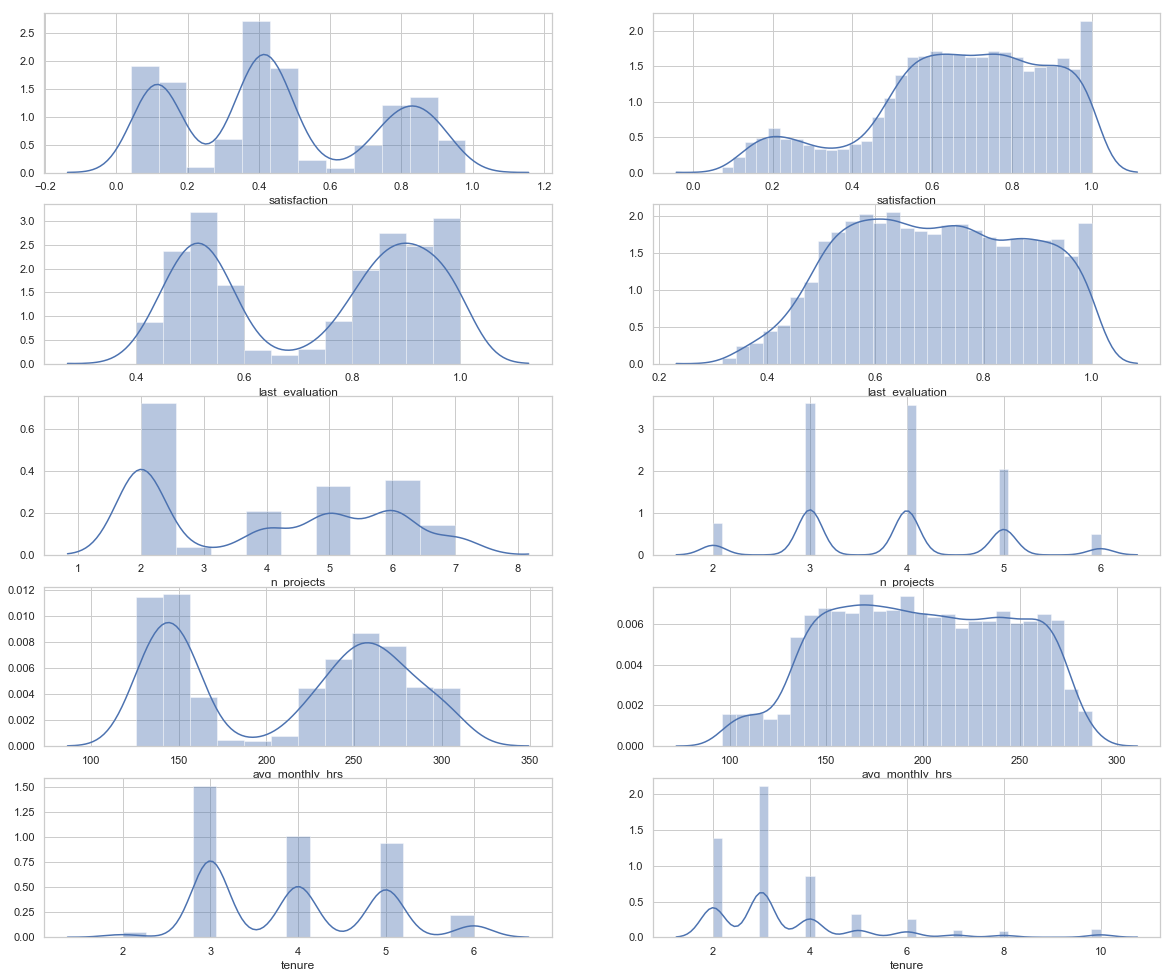

In [55]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(20,17))
ax1 = fig.add_subplot(521)
ax2 = fig.add_subplot(522)
ax3 = fig.add_subplot(523)
ax4 = fig.add_subplot(524)
ax5 = fig.add_subplot(525)
ax6 = fig.add_subplot(526)
ax7 = fig.add_subplot(527)
ax8 = fig.add_subplot(528)
ax9 = fig.add_subplot(529)
ax10 = fig.add_subplot(5,2,10)# Tell pointplot to plot on ax1 with the ax argument (satisfaction level)
sns.distplot(left_df['satisfaction'],ax = ax1);
sns.distplot(employed_df['satisfaction'],ax = ax2);
sns.distplot(left_df['last_evaluation'], kde=True,ax=ax3);
sns.distplot(employed_df['last_evaluation'], kde=True,ax=ax4);
sns.distplot(left_df['n_projects'], kde=True,ax=ax5);
sns.distplot(employed_df['n_projects'], kde=True,ax=ax6);
sns.distplot(left_df['avg_monthly_hrs'], kde=True,ax=ax7);
sns.distplot(employed_df['avg_monthly_hrs'], kde=True,ax=ax8);
sns.distplot(left_df['tenure'], kde=True,ax=ax9);
sns.distplot(employed_df['tenure'], kde=True,ax=ax10);

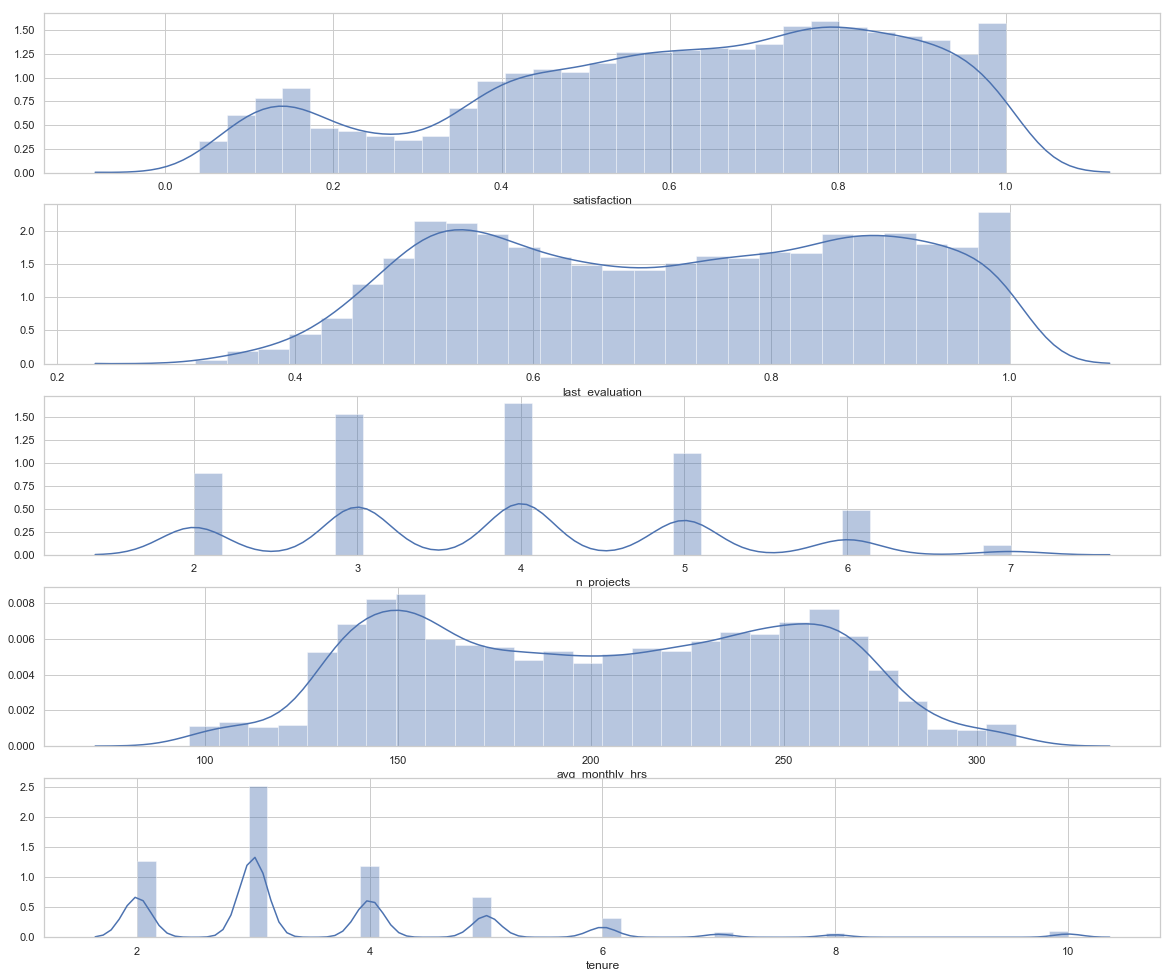

In [56]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(20,17))
ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)
sns.distplot(df['satisfaction'],ax = ax1);
sns.distplot(df['last_evaluation'], kde=True,ax=ax2);
sns.distplot(df['n_projects'], kde=True,ax=ax3);
sns.distplot(df['avg_monthly_hrs'], kde=True,ax=ax4);
sns.distplot(df['tenure'], kde=True,ax=ax5);

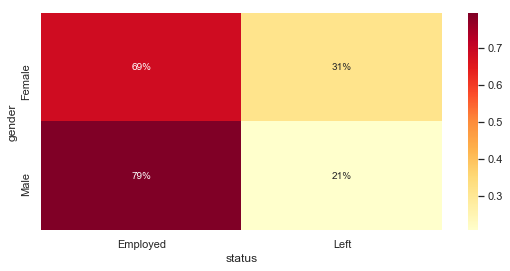

In [57]:
plt.figure(figsize=(9,4))
role_ed_xtab = pd.crosstab(df['gender'], df['status'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='YlOrRd')

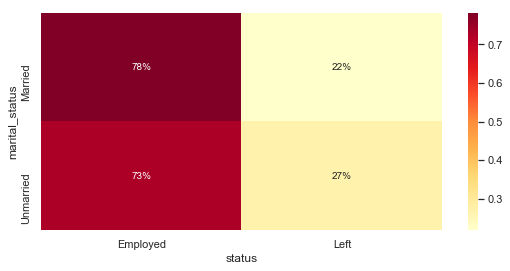

In [58]:
plt.figure(figsize=(9,4))
role_ed_xtab = pd.crosstab(df['marital_status'], df['status'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='YlOrRd')

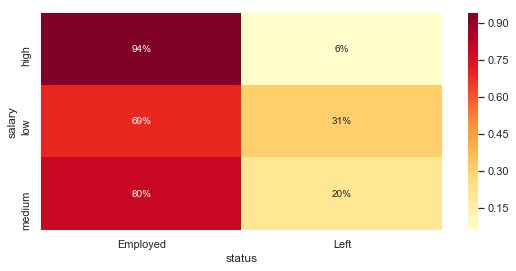

In [59]:
plt.figure(figsize=(9,4))
role_ed_xtab = pd.crosstab(df['salary'], df['status'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='YlOrRd')

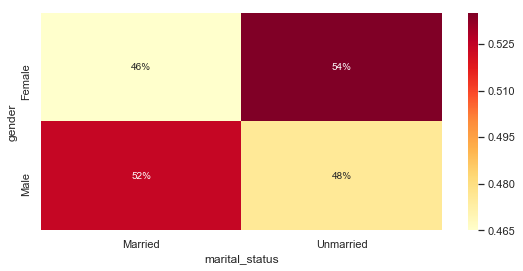

In [60]:
plt.figure(figsize=(9,4))
role_ed_xtab = pd.crosstab(df['gender'], df['marital_status'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='YlOrRd')

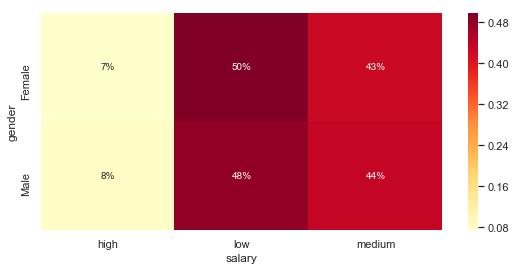

In [61]:
plt.figure(figsize=(9,4))
role_ed_xtab = pd.crosstab(df['gender'], df['salary'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='YlOrRd')

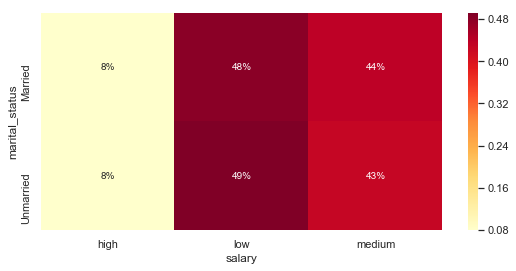

In [62]:
plt.figure(figsize=(9,4))
role_ed_xtab = pd.crosstab(df['marital_status'], df['salary'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='YlOrRd')

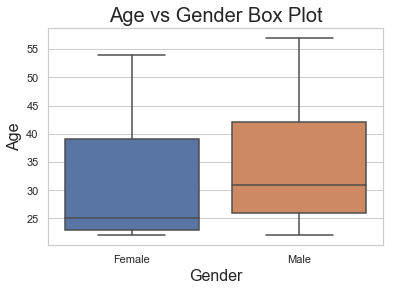

In [63]:
sns.boxplot(df['gender'], df['age'])
plt.title('Age vs Gender Box Plot', fontsize=20)      
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.show()

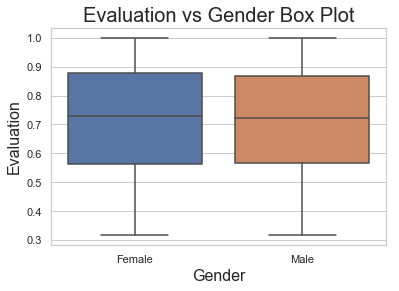

In [64]:
sns.boxplot(df['gender'], df['last_evaluation'])
plt.title('Evaluation vs Gender Box Plot', fontsize=20)      
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Evaluation', fontsize=16)
plt.show()

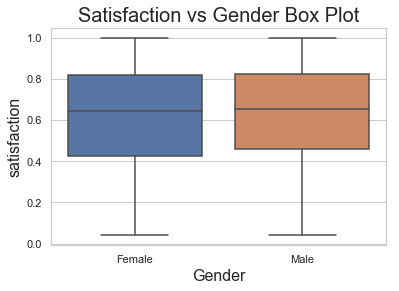

In [65]:
sns.boxplot(df['gender'], df['satisfaction'])
plt.title('Satisfaction vs Gender Box Plot', fontsize=20)      
plt.xlabel('Gender', fontsize=16)
plt.ylabel('satisfaction', fontsize=16)
plt.show()

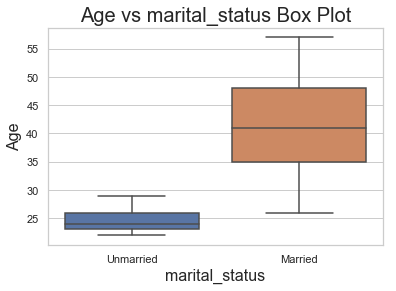

In [66]:
sns.boxplot(df['marital_status'], df['age'])
plt.title('Age vs marital_status Box Plot', fontsize=20)      
plt.xlabel('marital_status', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.show()

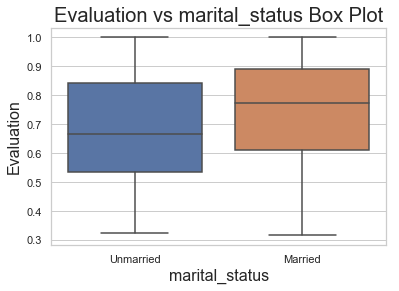

In [67]:
sns.boxplot(df['marital_status'], df['last_evaluation'])
plt.title('Evaluation vs marital_status Box Plot', fontsize=20)      
plt.xlabel('marital_status', fontsize=16)
plt.ylabel('Evaluation', fontsize=16)
plt.show()

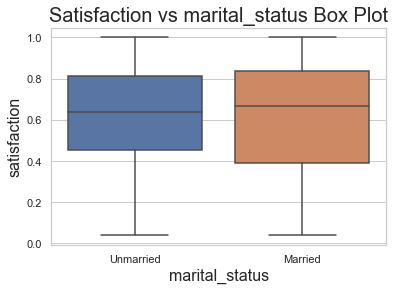

In [68]:
sns.boxplot(df['marital_status'], df['satisfaction'])
plt.title('Satisfaction vs marital_status Box Plot', fontsize=20)      
plt.xlabel('marital_status', fontsize=16)
plt.ylabel('satisfaction', fontsize=16)
plt.show()

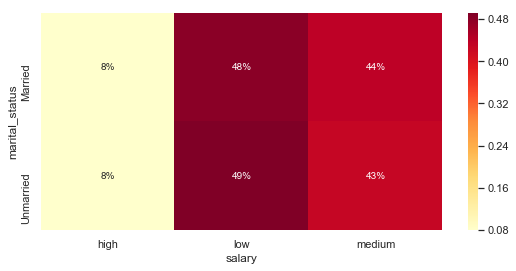

In [69]:
plt.figure(figsize=(9,4))
role_ed_xtab = pd.crosstab(df['marital_status'], df['salary'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='YlOrRd')

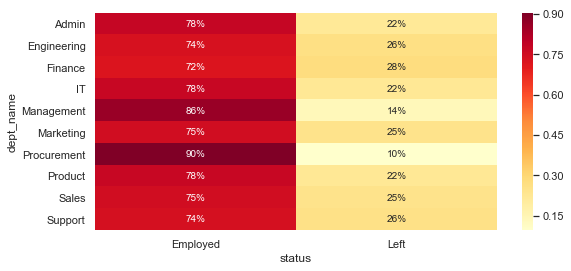

In [70]:
plt.figure(figsize=(9,4))
role_ed_xtab = pd.crosstab(df['dept_name'], df['status'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='YlOrRd')

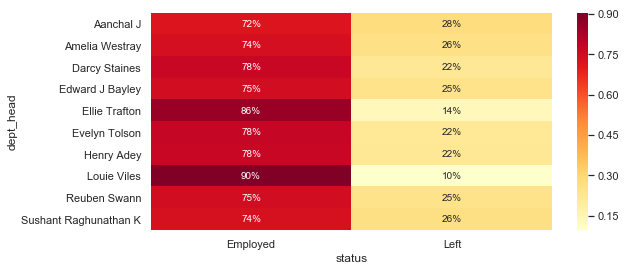

In [71]:
plt.figure(figsize=(9,4))
role_ed_xtab = pd.crosstab(df['dept_head'], df['status'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='YlOrRd')

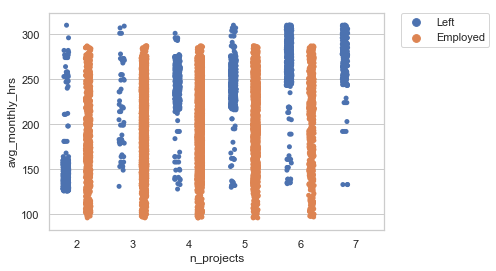

In [72]:
# stripplot
sns.stripplot(x='n_projects', y='avg_monthly_hrs', data=df, jitter=True, hue='status', dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

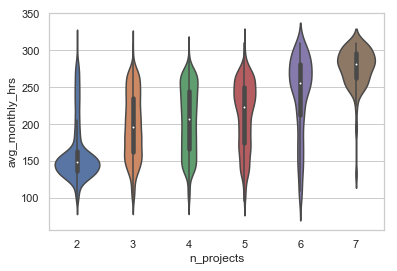

In [73]:
sns.violinplot(x='n_projects', y='avg_monthly_hrs', data=df)

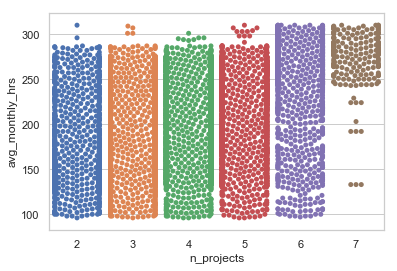

In [74]:
sns.swarmplot(x='n_projects', y='avg_monthly_hrs', data=df)

### Insights: Profile of the people who left

    satisfaction: Employees who left include both satisfied and dissatisfied with their job.
    last_evaluation: People leaving the company are majorly high and low performers. 
    So it could be that they did not get the right opportunities to work or maybe they got better opportunities elsewhere.
    n_projects: Most people are working on 2 projects.
    avg_montly_hrs: The average of 160 to 220 hours working people seem to be staying back. Those who are working less seem to be disconnected (lack of interest, motivation, etc.) and those working overtime seemed to be stressed.
    tenure: 3-5 years seems to be the age range where people decide if they want to stay back or leave. 

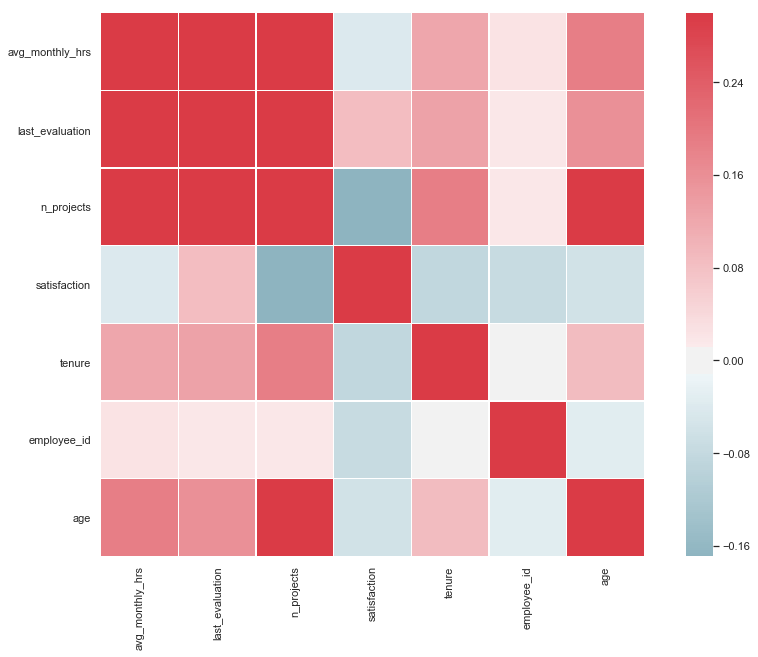

In [75]:
corr = df.corr()
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

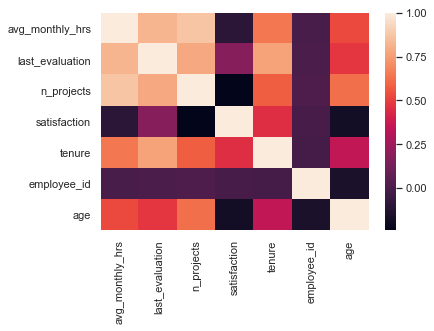

In [76]:
corr = left_df.corr()
sns.heatmap(corr)

## Insights: Correlated Elements

    n_projects and avg_monthly_hrs: More the projects, more the time you spend on them. This could be possibly the reason of dissatisfaction.
    last_evaluation and avg_monthly_hrs: This indicates that the longer the monthly hours, the more likely you get a good last evaluation. 
    satisfaction and tenure: They have decent correlation
    avg_monthly_hrs and age: Very strong correlation so indicates young people tend to work more
    n_projects and age:Same as above

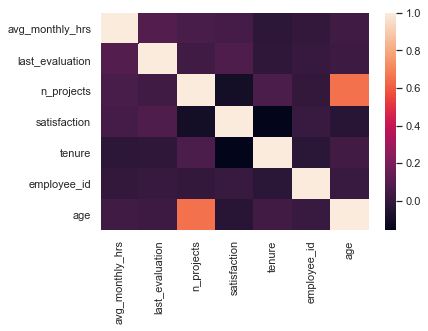

In [77]:
corr = employed_df.corr()
sns.heatmap(corr)

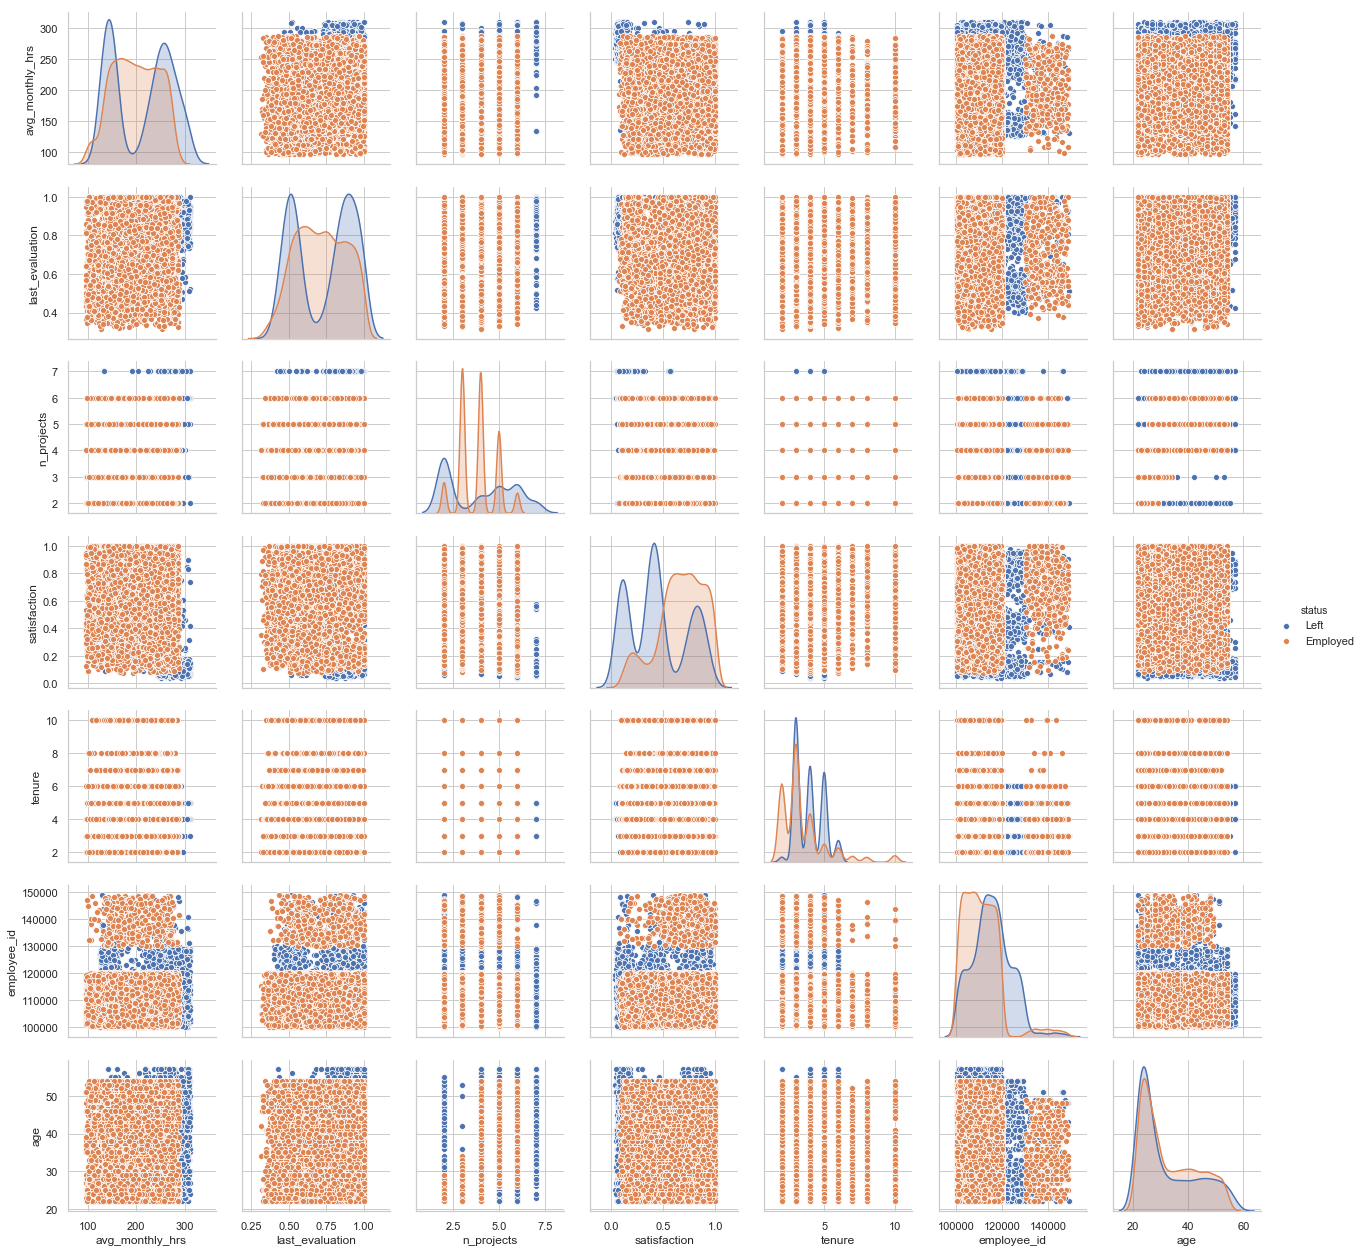

In [78]:
sns.pairplot(data=df,kind='scatter', hue='status')

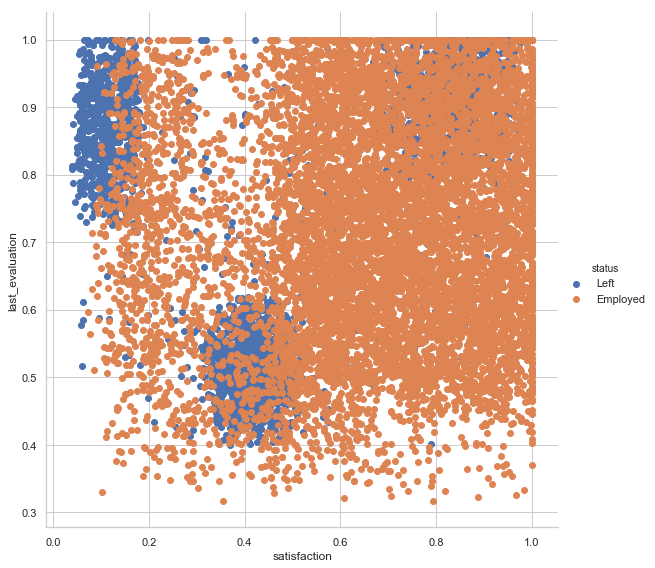

In [79]:
sns.FacetGrid(df, hue="status", height=8) \
    .map(plt.scatter, "satisfaction", "last_evaluation") \
    .add_legend();
plt.show();

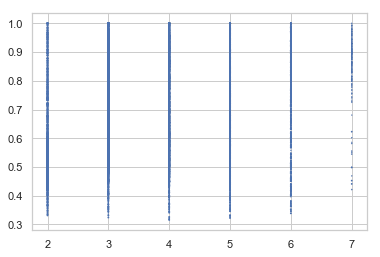

In [80]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['n_projects'],df['last_evaluation'], s=df['satisfaction']) # Added third variable income as size of the bubble
plt.show()

Text(0.5, 1.0, 'Age vs Evaluation Scatter Plot')

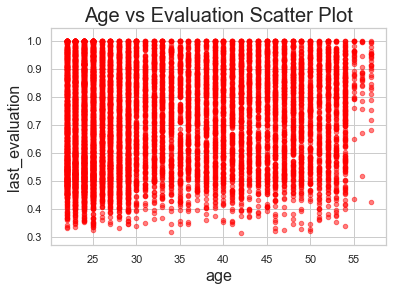

In [81]:
df.plot(kind='scatter', x='age', y='last_evaluation',alpha = 0.5,color = 'red')
plt.xlabel('age', fontsize=16)             
plt.ylabel('last_evaluation', fontsize=16)
plt.title('Age vs Evaluation Scatter Plot', fontsize=20)           

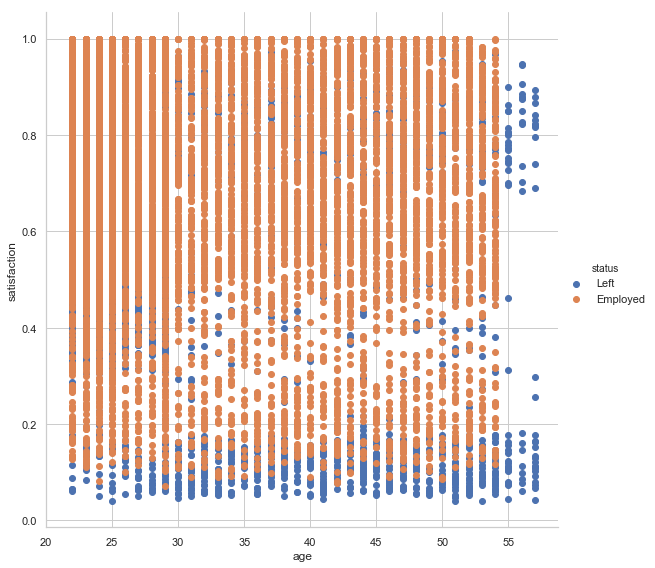

In [82]:
sns.FacetGrid(df, hue="status", height=8) \
    .map(plt.scatter, "age", "satisfaction") \
    .add_legend();
plt.show();

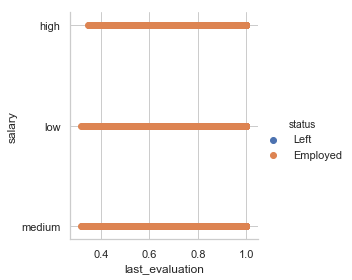

In [83]:
sns.FacetGrid(df, hue="status", height=4) \
    .map(plt.scatter, "last_evaluation", "salary") \
    .add_legend();
plt.show();

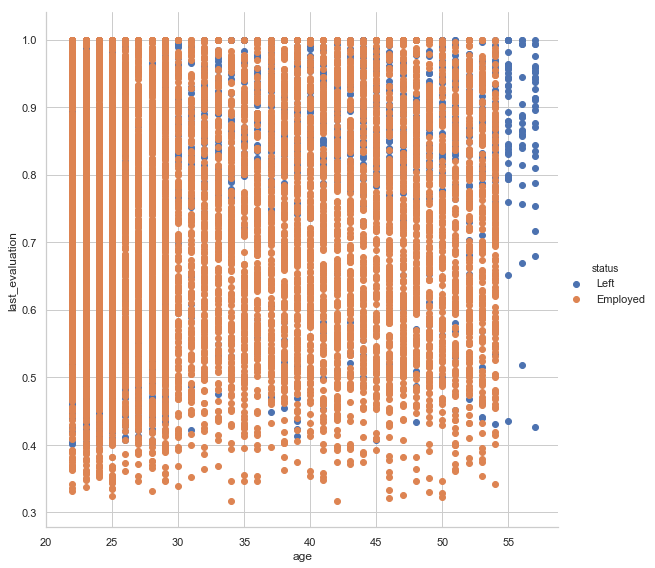

In [84]:
sns.FacetGrid(df, hue="status", height=8) \
    .map(plt.scatter, "age", "last_evaluation") \
    .add_legend();
plt.show();

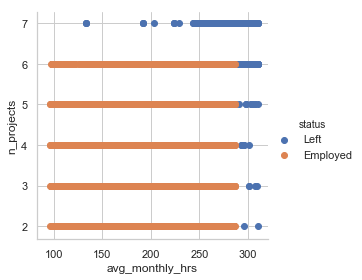

In [85]:
sns.FacetGrid(df, hue="status", height=4) \
    .map(plt.scatter, "avg_monthly_hrs", "n_projects") \
    .add_legend();
plt.show();

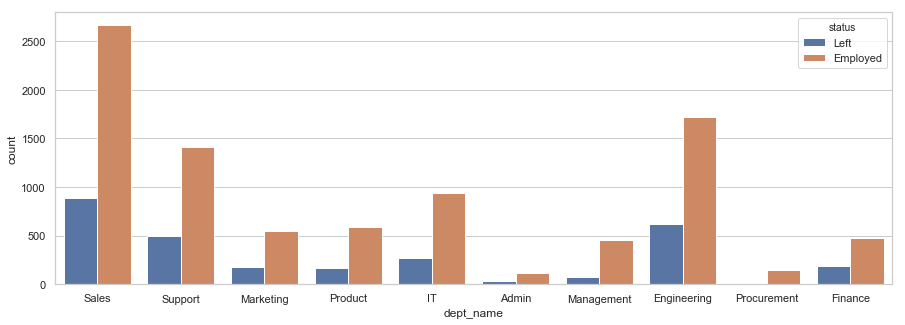

In [86]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='dept_name', hue="status", data=df, ax=axis1)

In [87]:
departments = df['dept_name'].unique()
departments = departments[departments != 'unknown']
departments

array(['Sales', 'Support', 'Marketing', 'Product', 'IT', 'Admin',
       'Management', 'Engineering', 'Procurement', 'Finance'],
      dtype=object)

In [88]:
print ("Department  - Employees % - Dept. Attrition % - Overall Attrition %")
for dept in departments:
    print ("%-11s - %-11.2f - %-17.2f - %-6.2f" %(dept, \
                                        df[(df['dept_name'] == dept)]['dept_name'].count()/df['dept_name'].count() * 100, \
                                        df[(df['dept_name'] == dept) & (df['status'] == "Left")]['dept_name'].count()/df[(df['dept_name'] == dept)]['dept_name'].count() * 100, \
                                        df[(df['dept_name'] == dept) & (df['status'] == "Left")]['dept_name'].count()/df[(df['status'] == "Left")]['dept_name'].count() * 100))

Department  - Employees % - Dept. Attrition % - Overall Attrition %
Sales       - 29.59       - 24.97             - 30.32 
Support     - 15.86       - 25.81             - 16.80 
Marketing   - 6.08        - 24.83             - 6.19  
Product     - 6.36        - 22.31             - 5.82  
IT          - 10.13       - 22.39             - 9.31  
Admin       - 1.28        - 22.22             - 1.16  
Management  - 4.45        - 13.88             - 2.53  
Engineering - 19.44       - 26.38             - 21.05 
Procurement - 1.30        - 9.62              - 0.51  
Finance     - 5.51        - 27.88             - 6.30  


In [89]:
employee_count_by_department = np.zeros(len(departments))
dept_attrition = np.zeros(len(departments))
overall_attrition = np.zeros(len(departments))
i = 0
for dept in departments:
    employee_count_by_department[i] = df[(df['dept_name'] == dept)]['dept_name'].count()/df['dept_name'].count() * 100
    dept_attrition[i] = df[(df['dept_name'] == dept) & (df['status'] == "Left")]['dept_name'].count()/df[(df['dept_name'] == dept)]['dept_name'].count() * 100
    overall_attrition[i] = df[(df['dept_name'] == dept) & (df['status'] == "Left")]['dept_name'].count()/df[(df['status'] == "Left")]['dept_name'].count() * 100
    i += 1

attrition_df = pd.DataFrame({'Employee_Percentage': employee_count_by_department, 'Dept_attrition': dept_attrition, 'Overall_attrition': overall_attrition}, index=departments)
attrition_df

,Employee_Percentage,Dept_attrition,Overall_attrition
Sales,29.593794,24.971815,30.321697
Support,15.864542,25.814932,16.803559
Marketing,6.080574,24.828532,6.194387
Product,6.355826,22.309711,5.817933
IT,10.134290,22.386831,9.308693
Admin,1.276170,22.222222,1.163587
Management,4.445742,13.883677,2.532512
Engineering,19.442823,26.383526,21.047228
Procurement,1.301193,9.615385,0.513347
Finance,5.505046,27.878788,6.297057


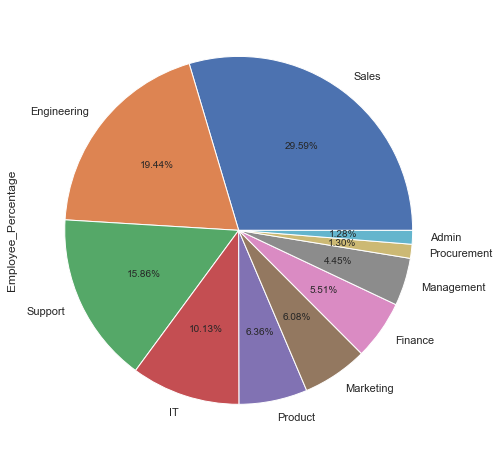

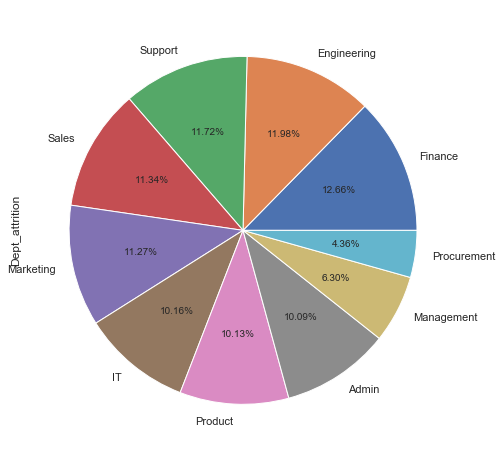

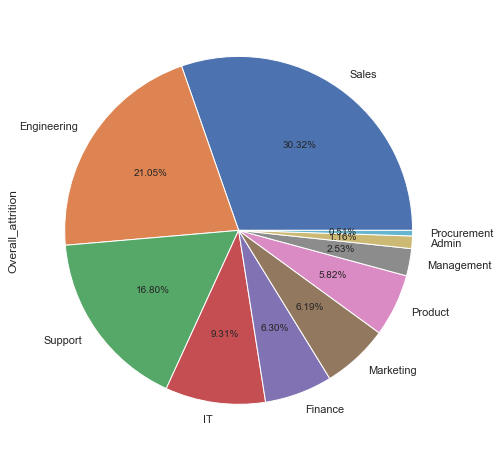

In [90]:
attrition_df.sort_values(by='Employee_Percentage', ascending=False).plot.pie('Employee_Percentage', legend=False, autopct='%.2f%%', figsize=(8,8))
attrition_df.sort_values(by='Dept_attrition', ascending=False).plot.pie('Dept_attrition', legend=False, autopct='%.2f%%', figsize=(8,8))
attrition_df.sort_values(by='Overall_attrition', ascending=False).plot.pie('Overall_attrition', legend=False, autopct='%.2f%%', figsize=(8,8))

<a id = section4></a>

## Probing Questions

### Which departments whose people leave most often?

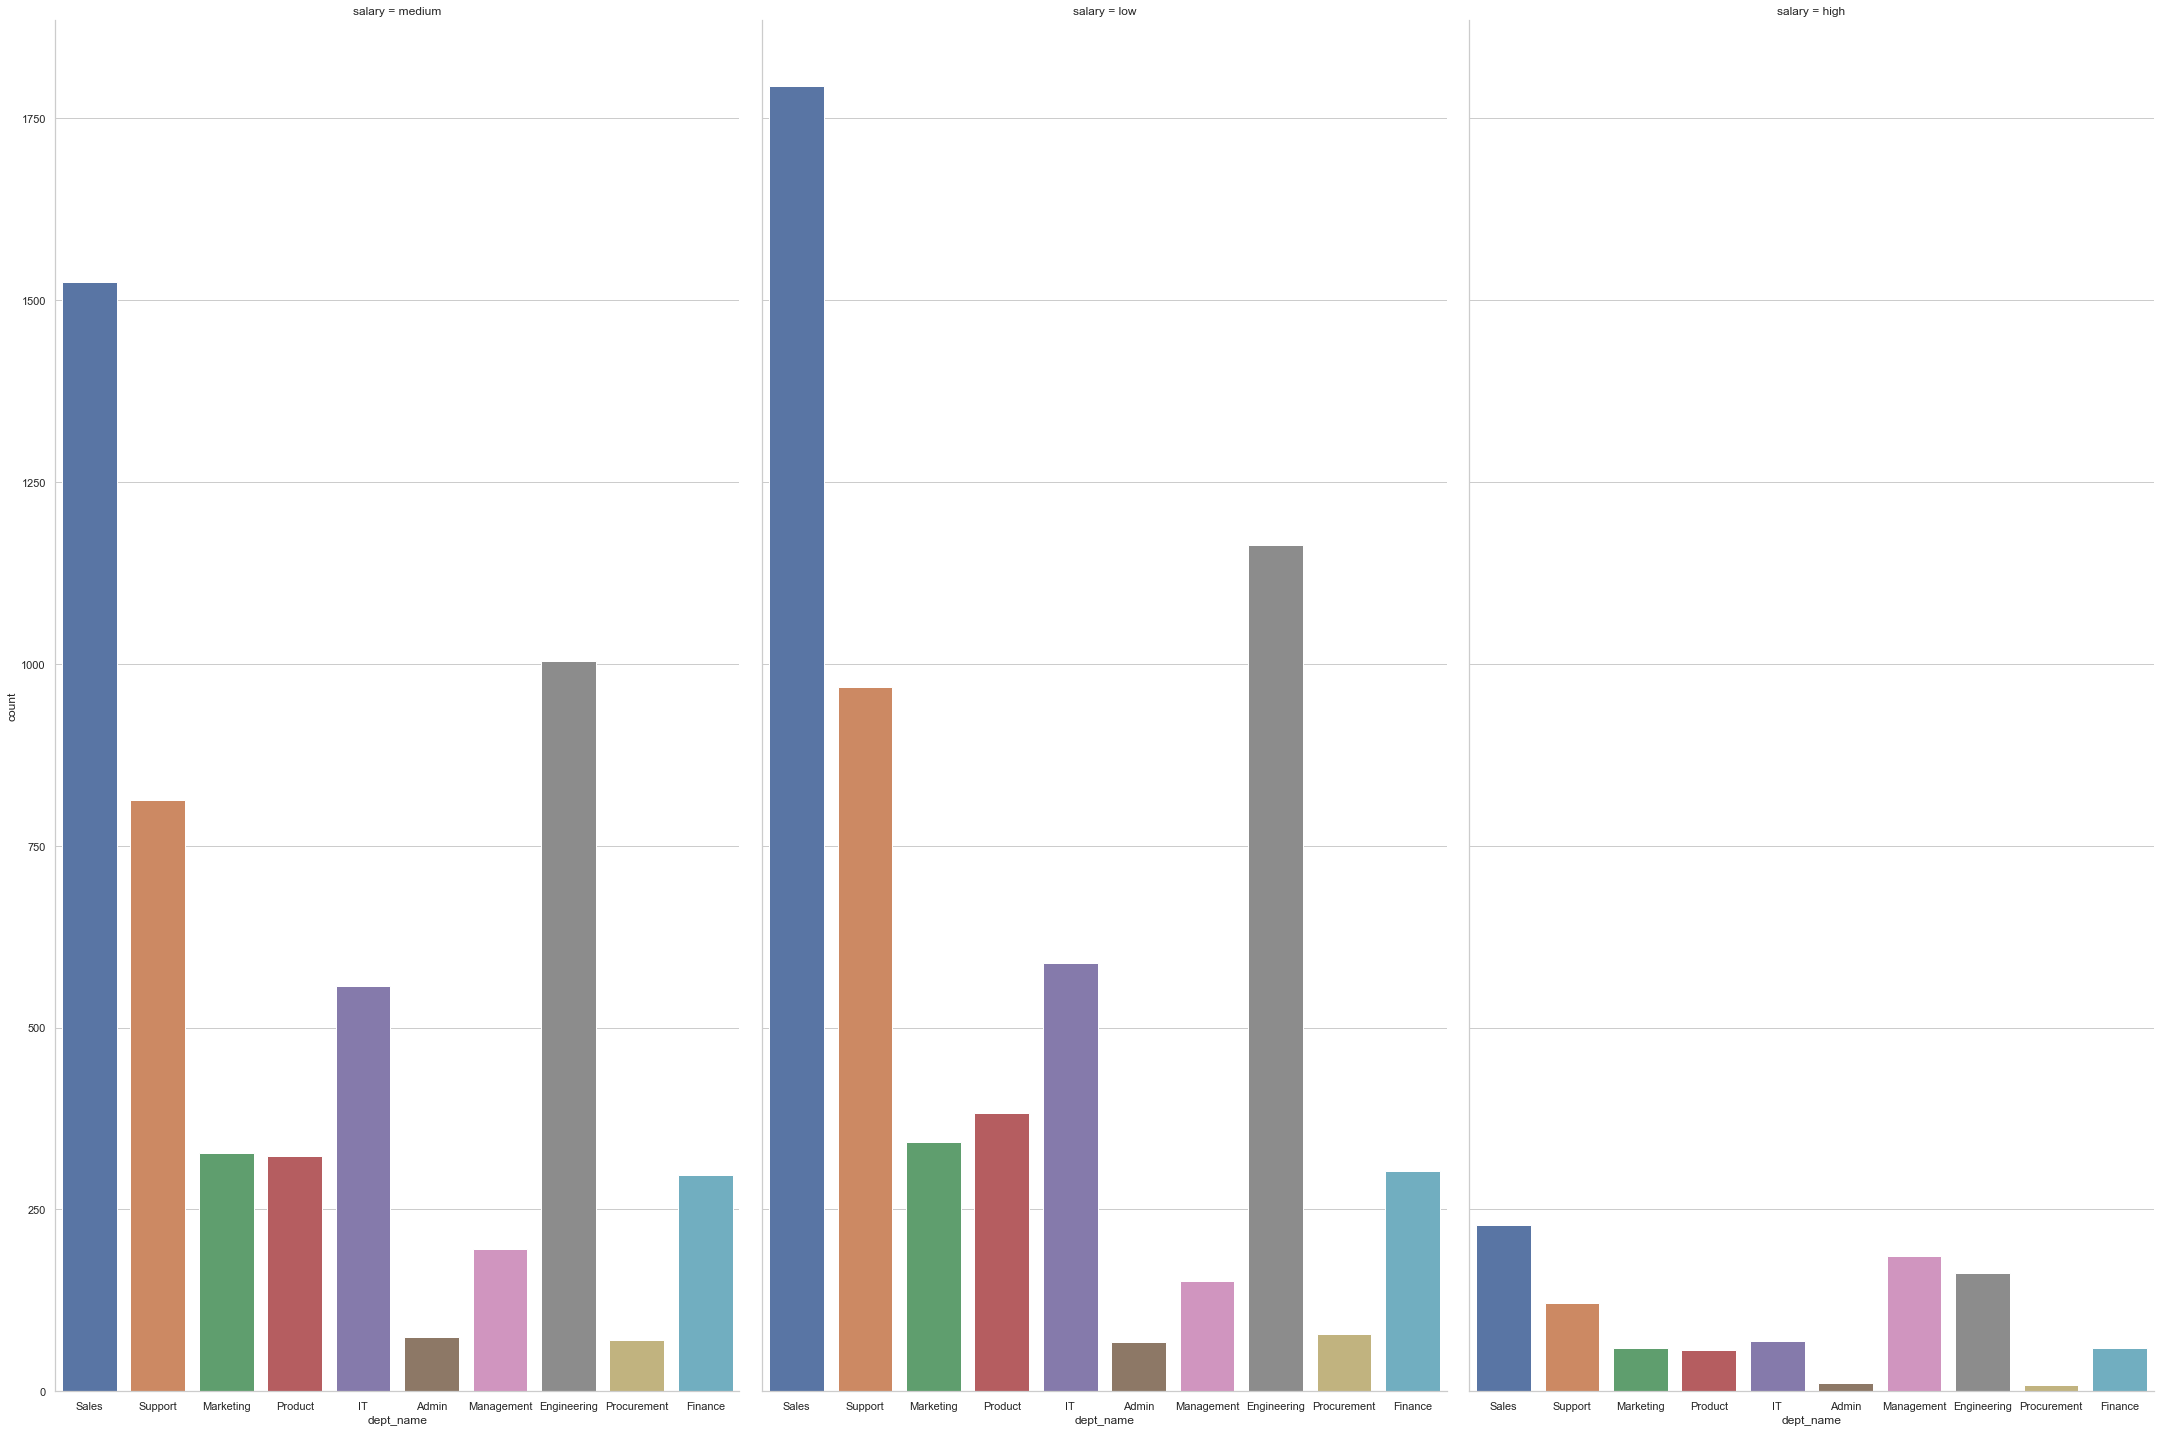

In [91]:
sns.catplot(x="dept_name",data=df,col="salary",kind="count",aspect=0.5,height=20)

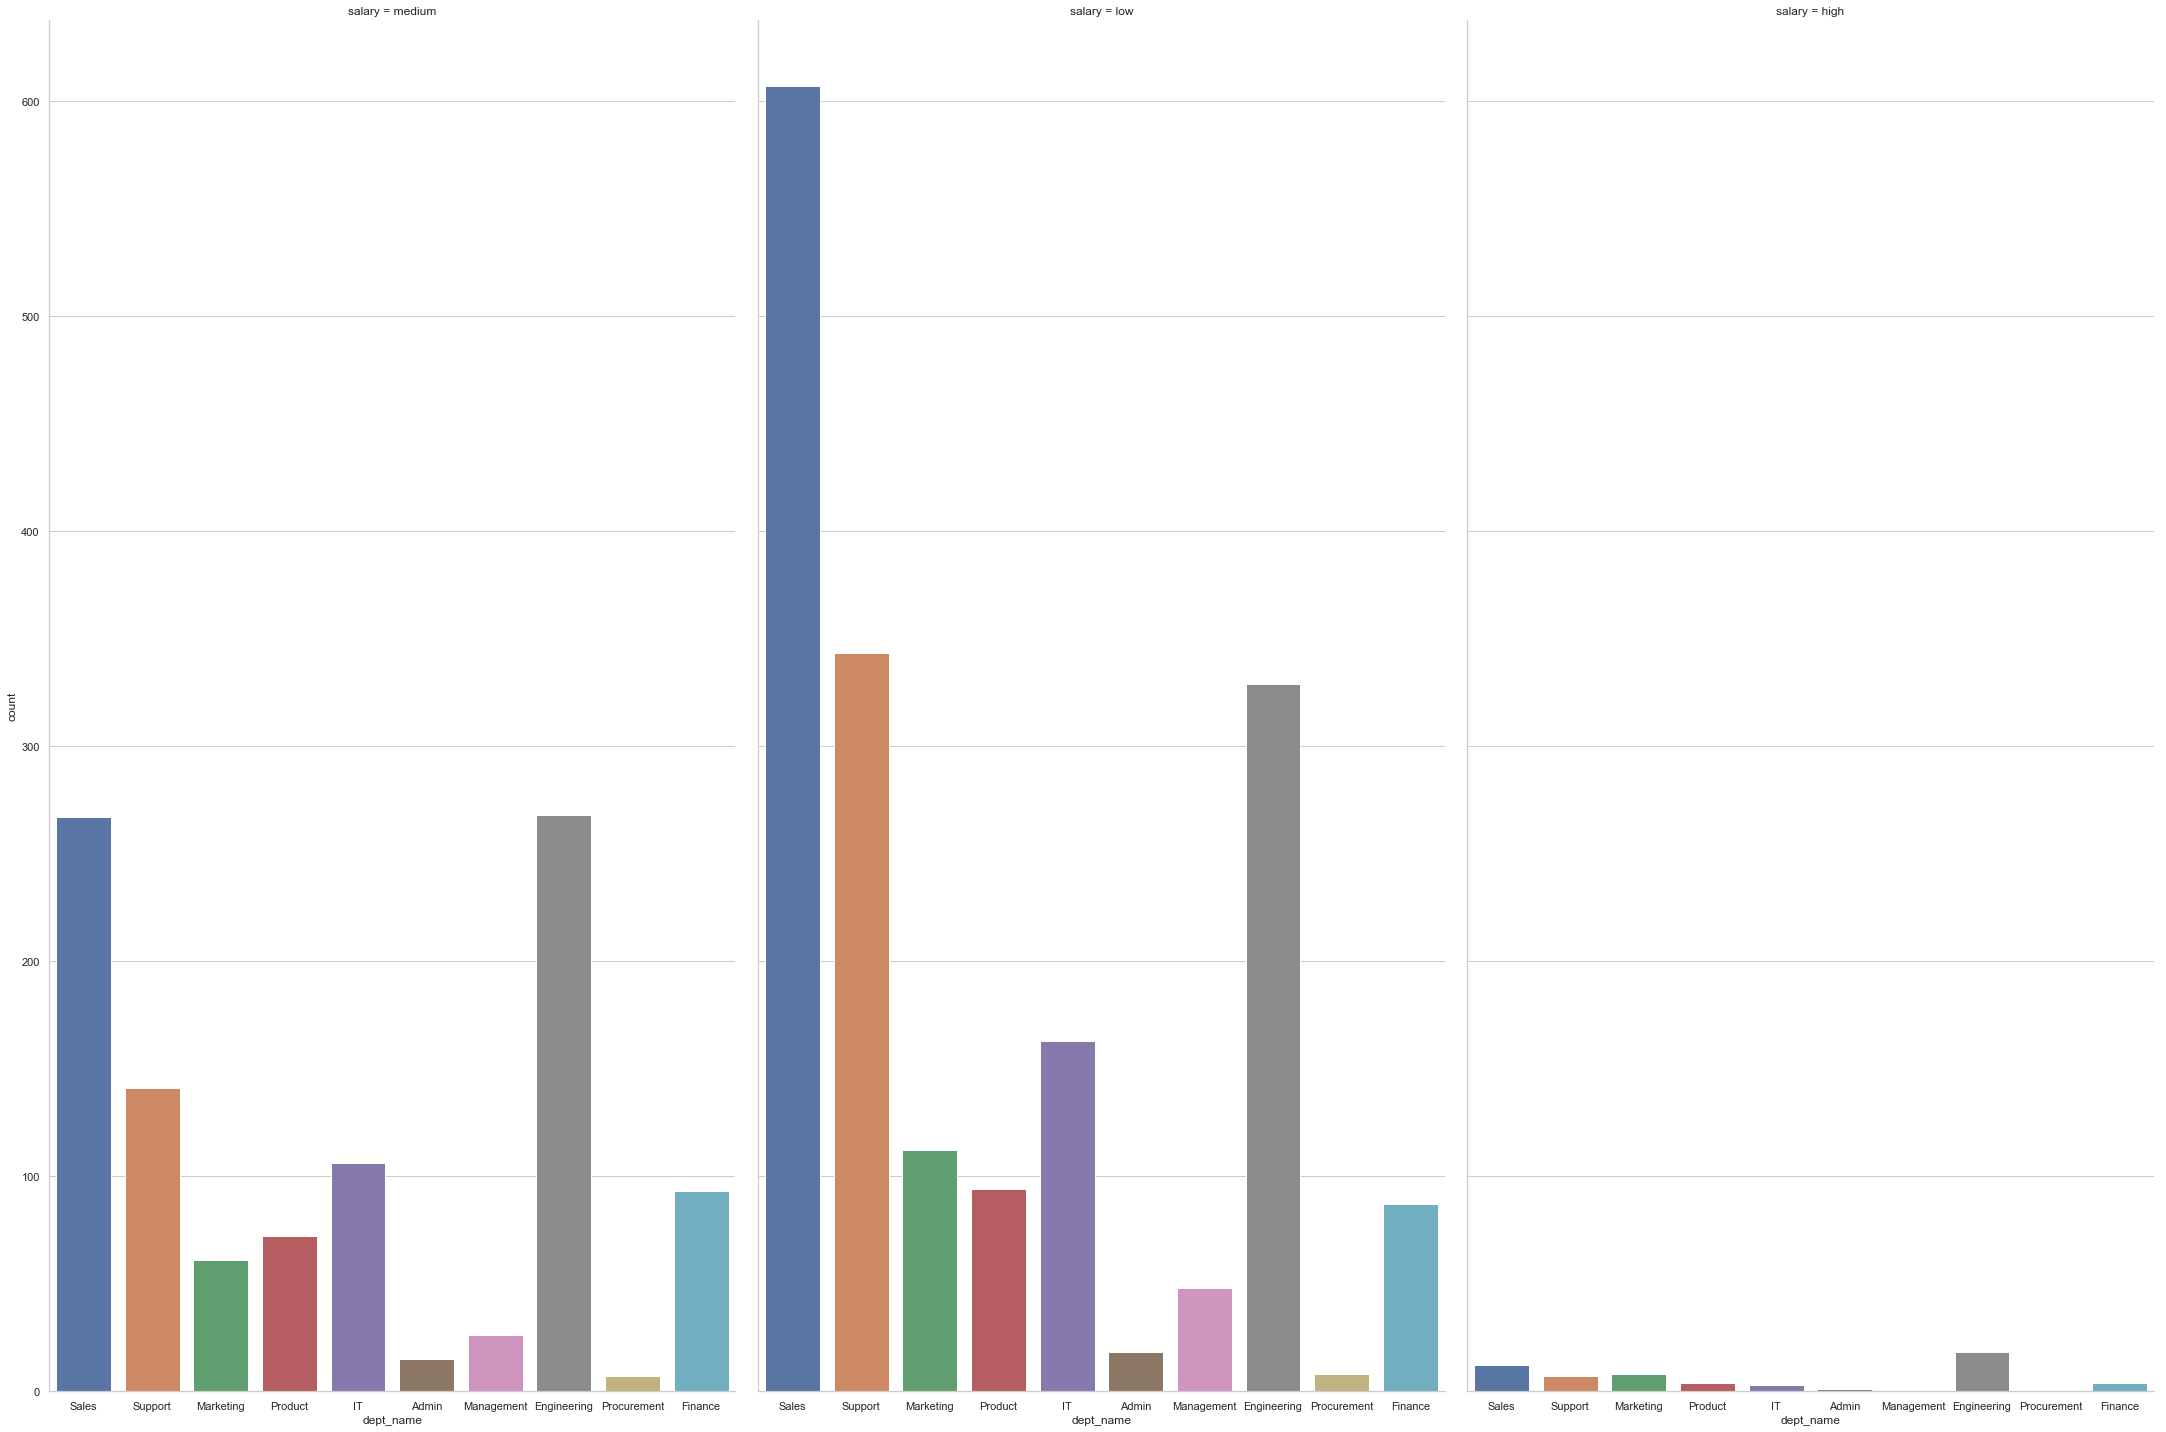

In [92]:
sns.catplot(x="dept_name",data=left_df,col="salary",kind="count",aspect=0.5,height=20)

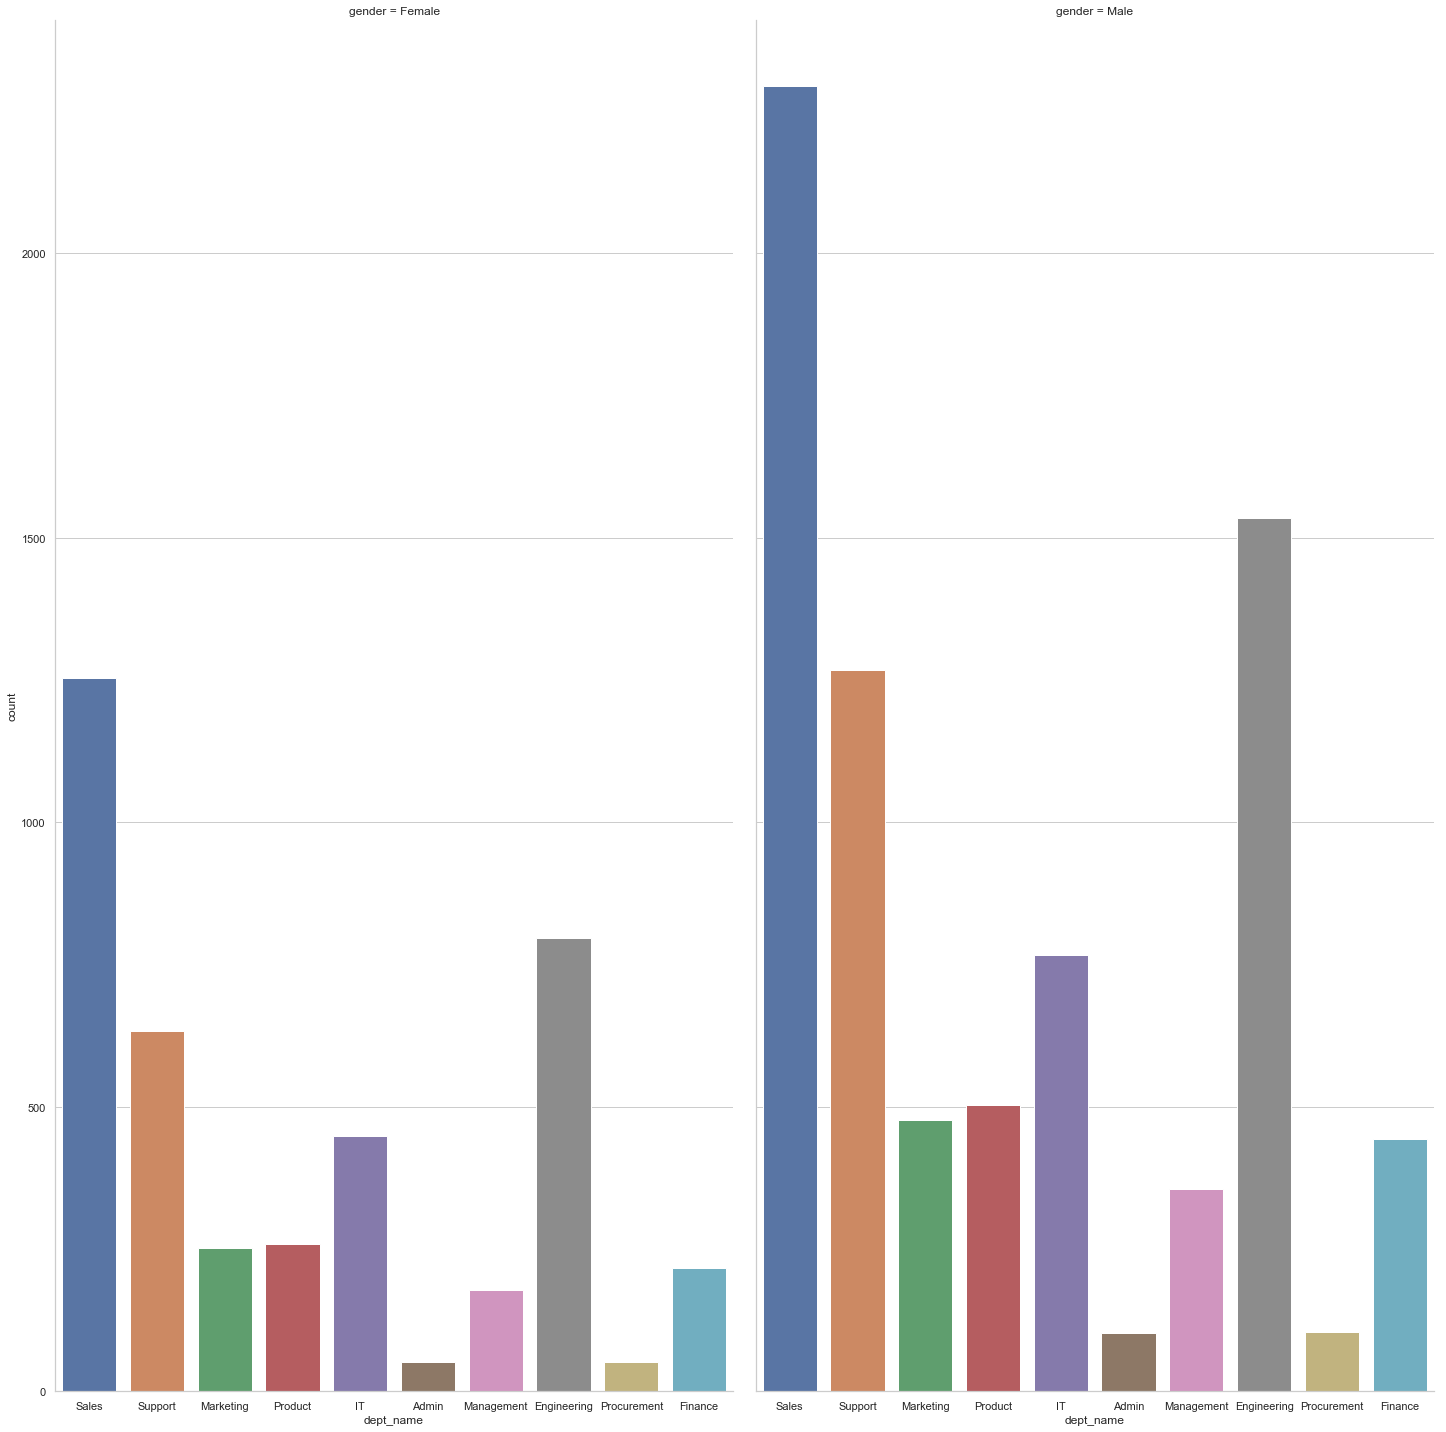

In [93]:
sns.catplot(x="dept_name",data=df,col="gender",kind="count",aspect=0.5,height=20)

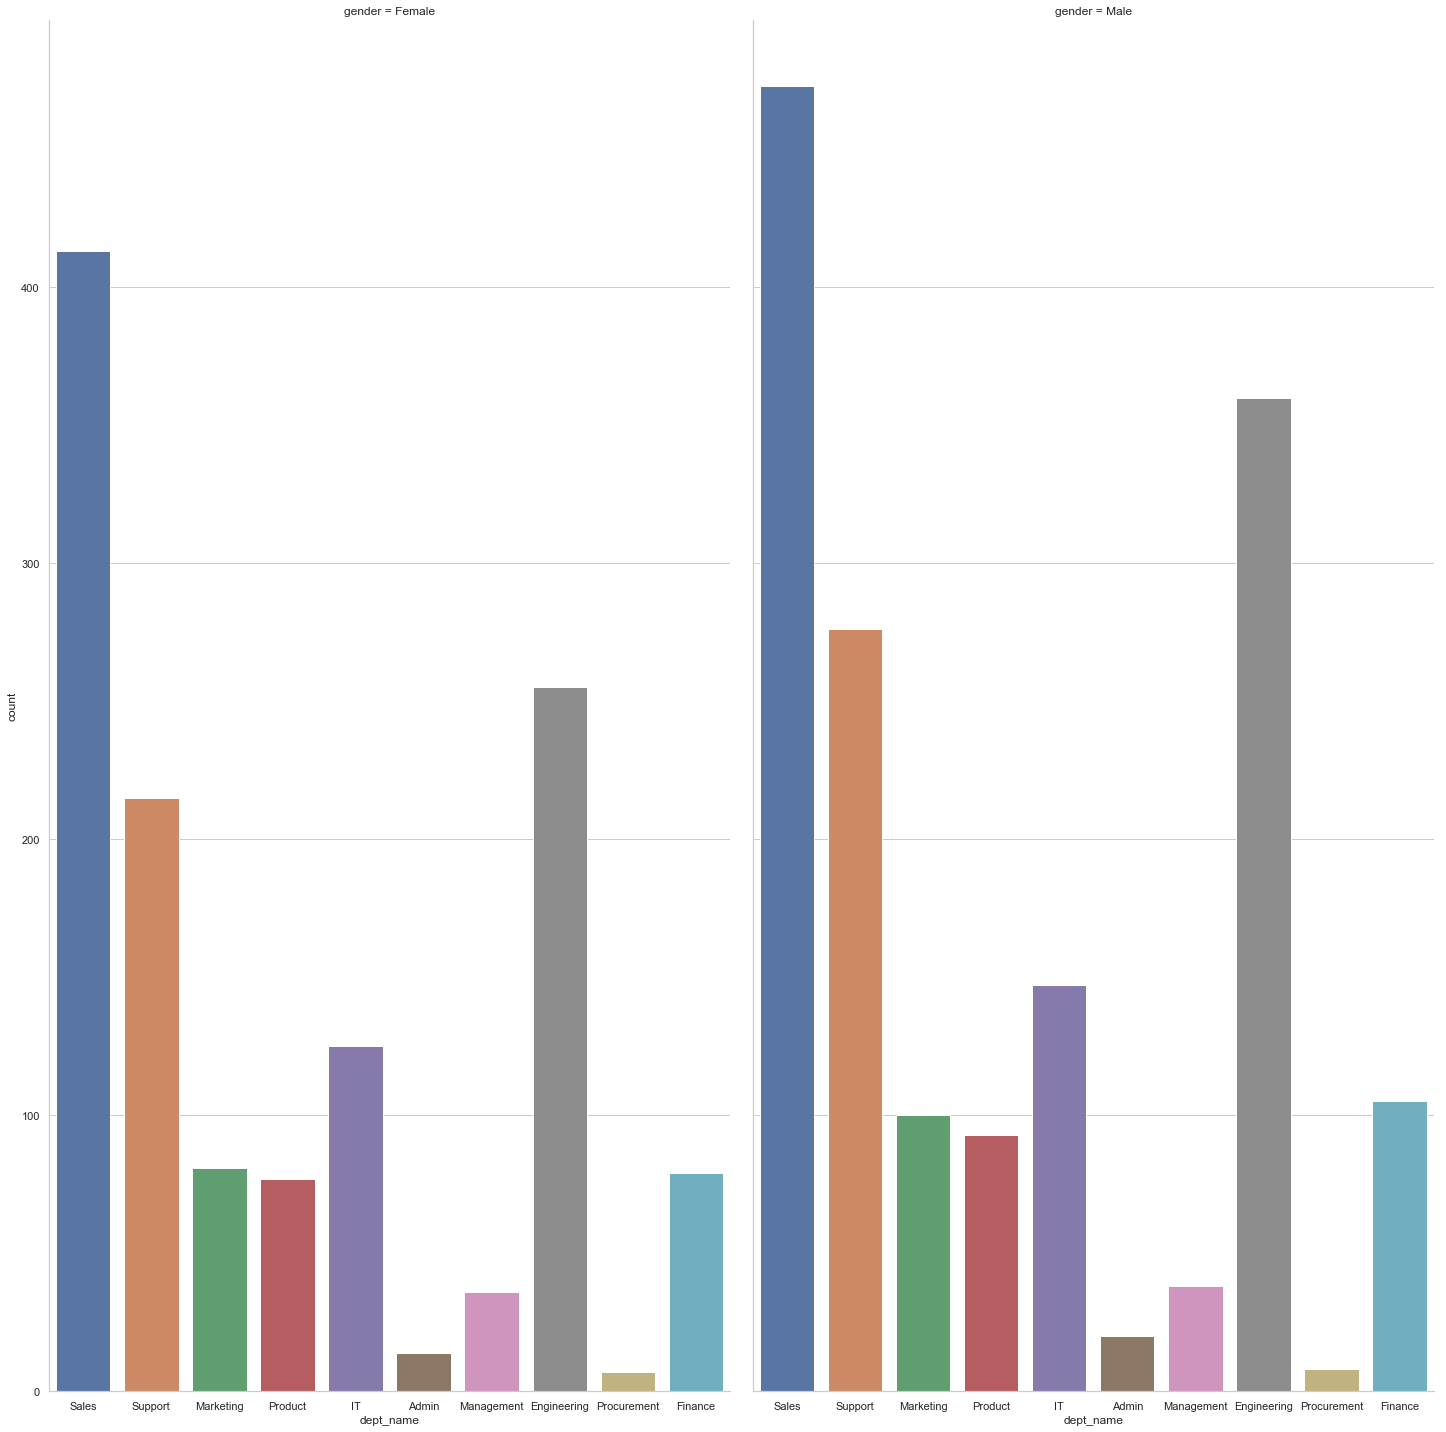

In [94]:
sns.catplot(x="dept_name",data=left_df,col="gender",kind="count",aspect=0.5,height=20)

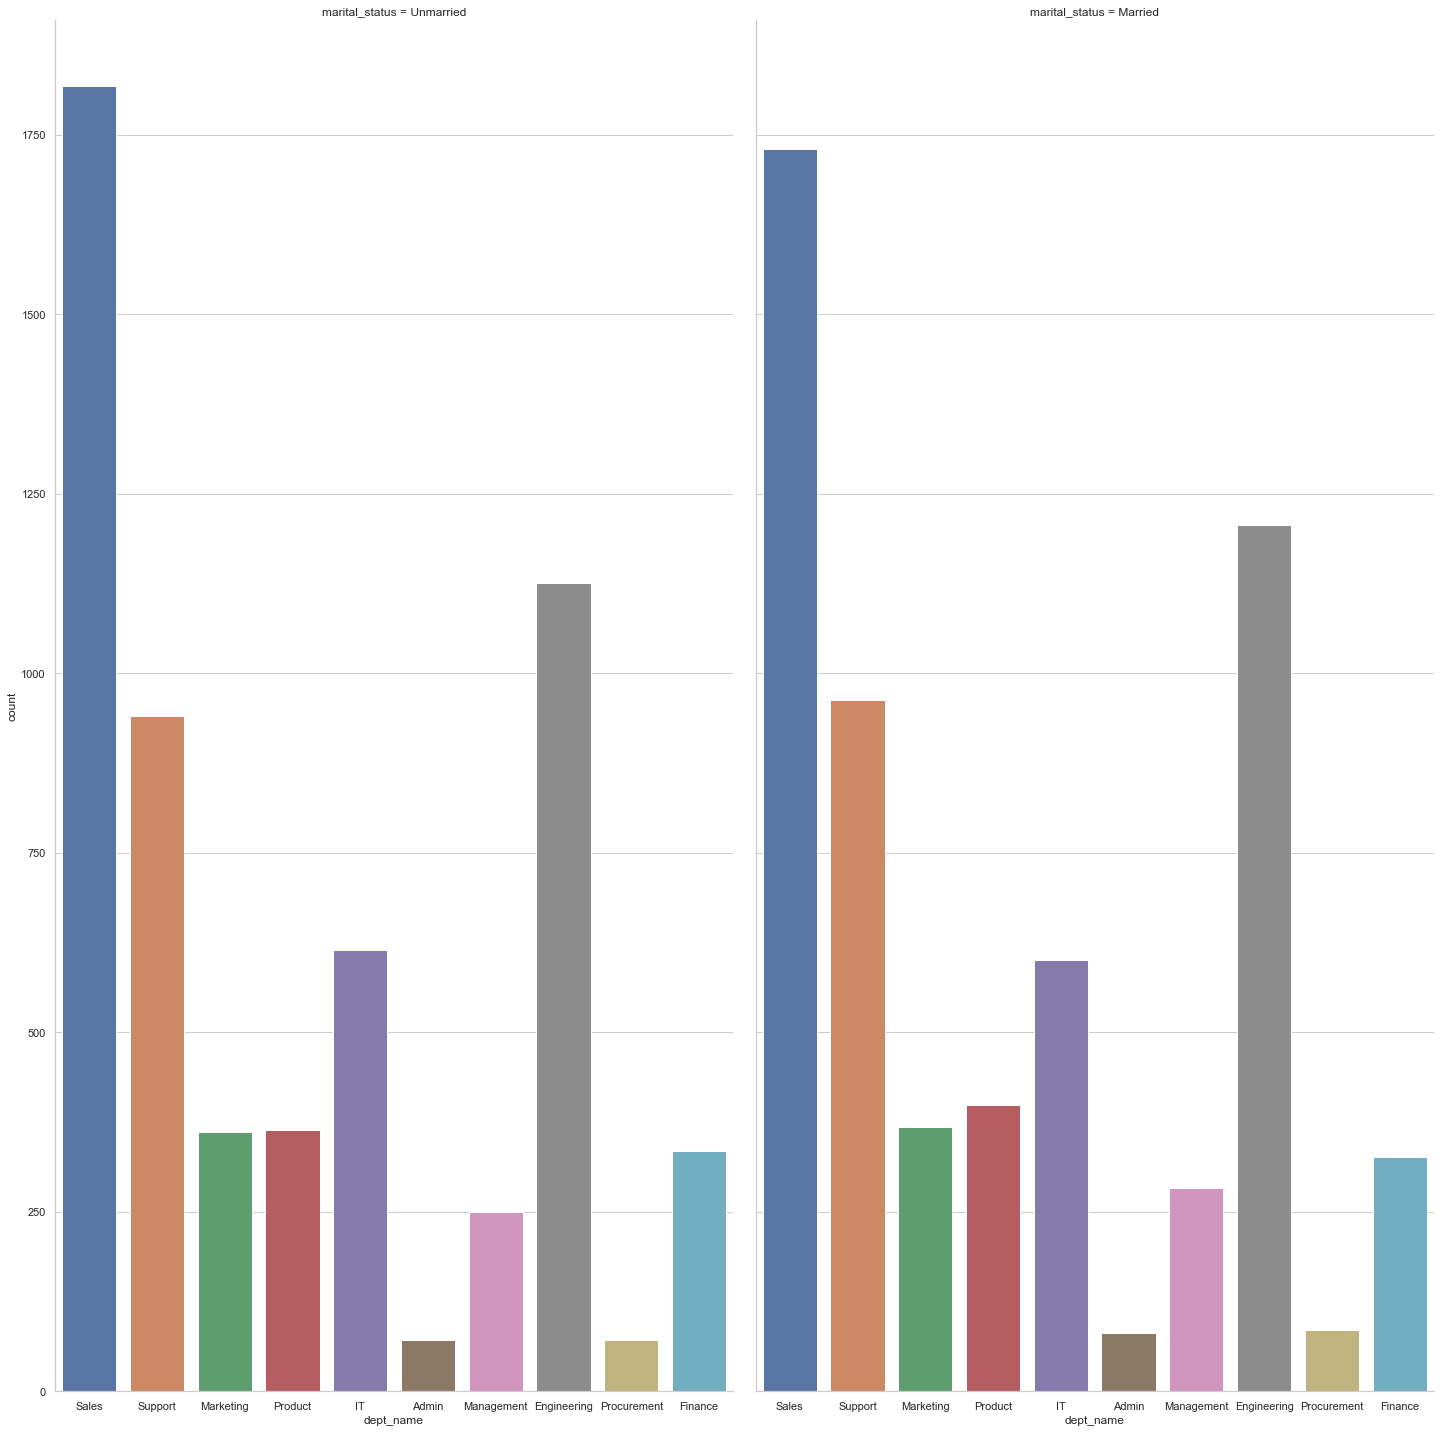

In [95]:
sns.catplot(x="dept_name",data=df,col="marital_status",kind="count",aspect=0.5,height=20)

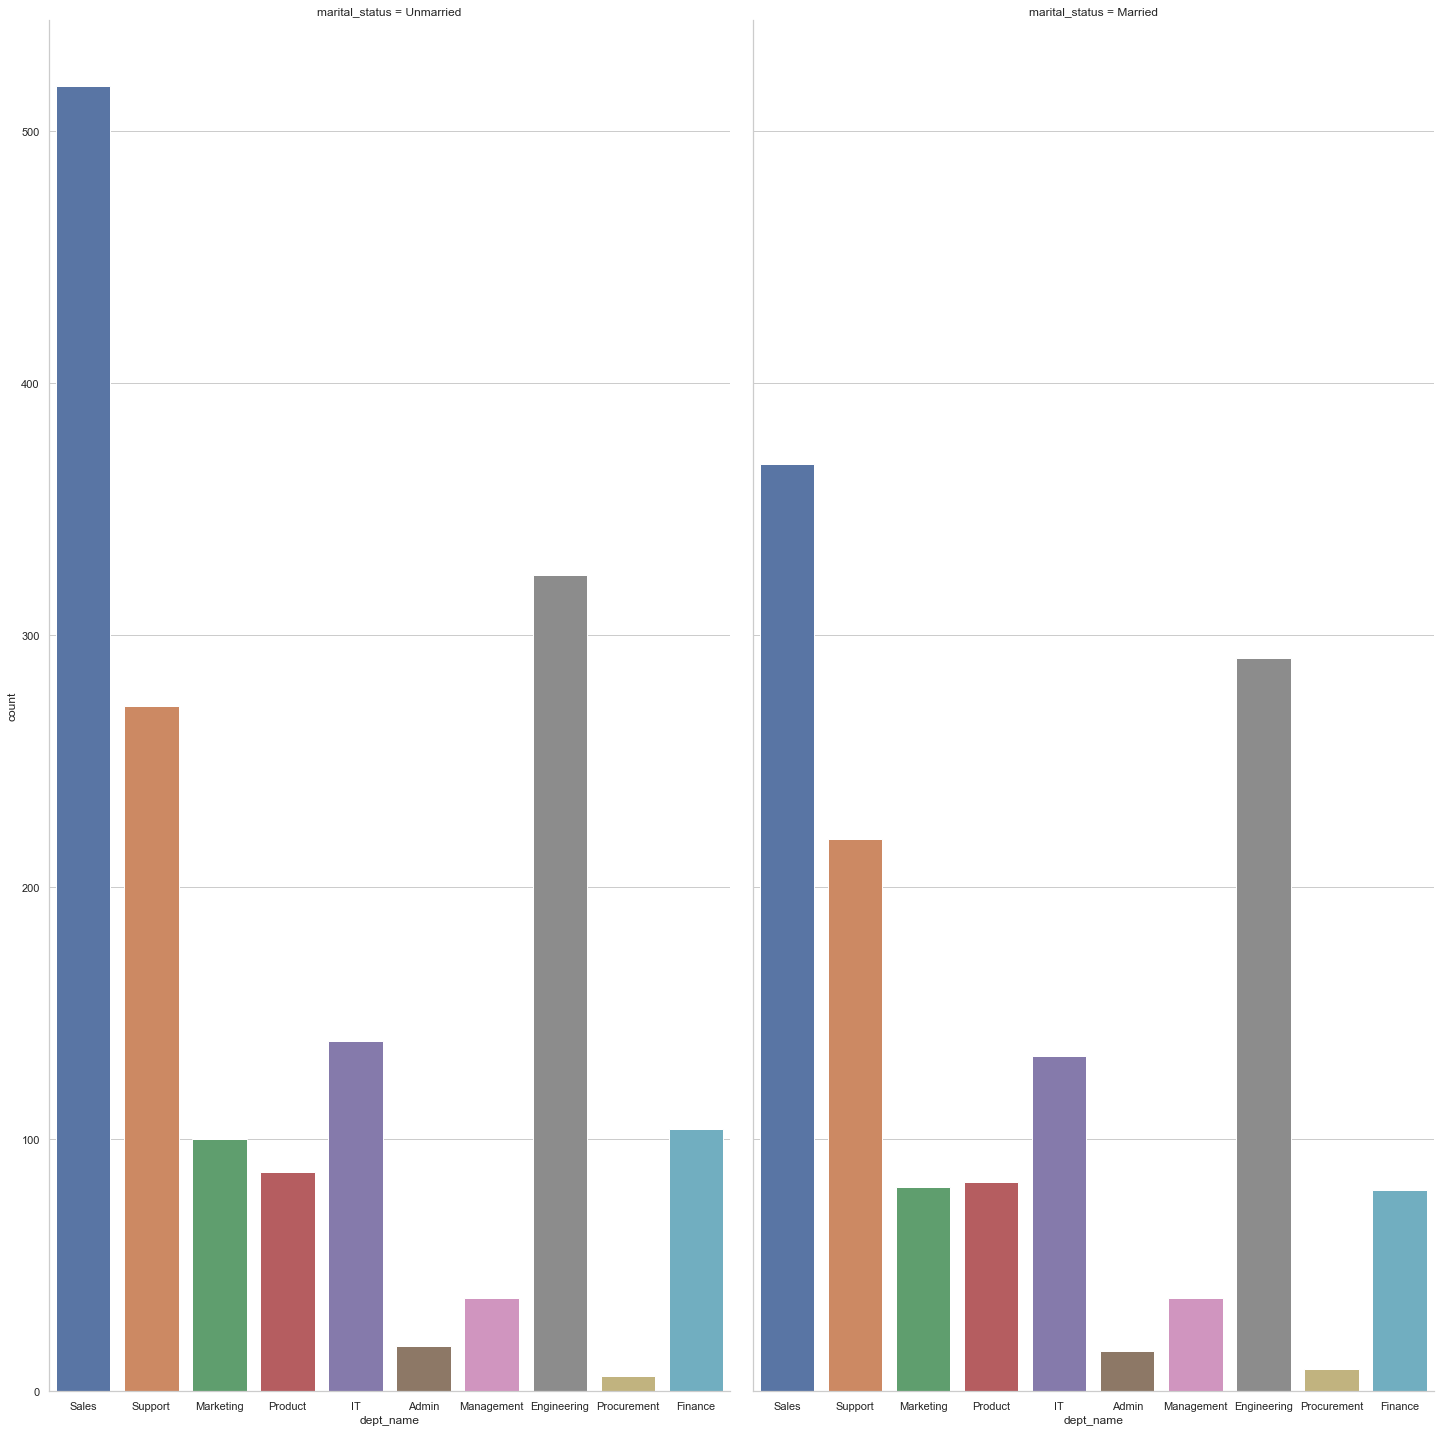

In [96]:
sns.catplot(x="dept_name",data=left_df,col="marital_status",kind="count",aspect=0.5,height=20)

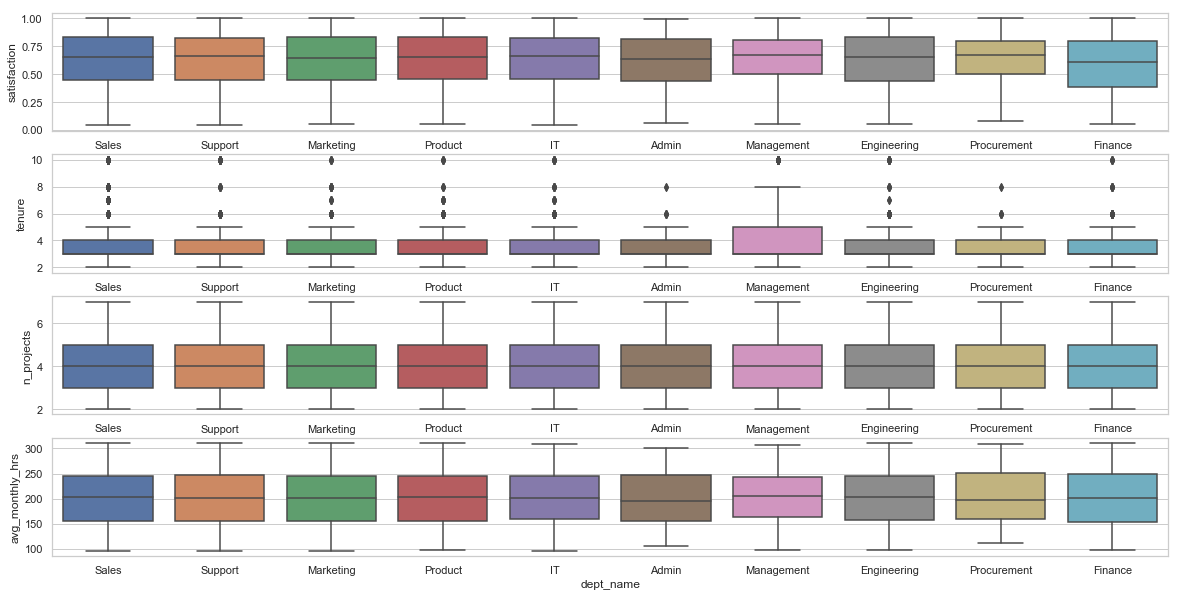

In [97]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sns.boxplot(x="dept_name",y="satisfaction",data=df,ax=ax1)
sns.boxplot(x="dept_name",y="tenure",data=df,ax=ax2)
sns.boxplot(x="dept_name",y="n_projects",data=df,ax=ax3)
sns.boxplot(x="dept_name",y="avg_monthly_hrs",data=df,ax=ax4)

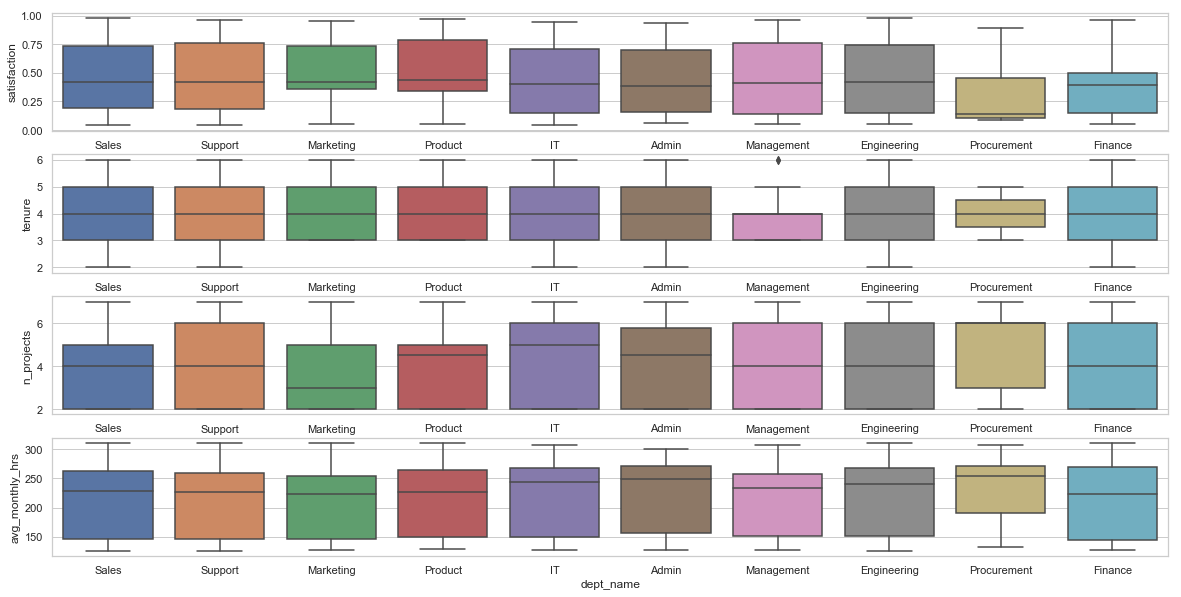

In [98]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sns.boxplot(x="dept_name",y="satisfaction",data=left_df,ax=ax1)
sns.boxplot(x="dept_name",y="tenure",data=left_df,ax=ax2)
sns.boxplot(x="dept_name",y="n_projects",data=left_df,ax=ax3)
sns.boxplot(x="dept_name",y="avg_monthly_hrs",data=left_df,ax=ax4)

### Insights from the above graphs
    The satisfaction level in Sales, engineering and support department is actually higher than procurement and finance. This means that probably they left because of low salary.
    Procurement and Finance have the lowest satisfaction level with most of the quartiles located below 0.5. So that could account for the attrition in finance but not procurement team. Procurement team is handling more projects and their working hours are still in the niche region. Work Balance might be the critical factor there.
    Marketing and product have high satisfaction levels despite high rate of quitting owing low salary.
    One interesting observation is that married people tend to quit less compared to unmarried. This is probably that the former wants more settlement than risk taking attitude in former.
    Also the amount of women quitting is quite alarming. This is probable due to marriage, child care, etc.

<a id = section5></a>

## Feature Engineering

In [110]:
df.columns

Index(['avg_monthly_hrs', 'last_evaluation', 'n_projects', 'salary',
       'satisfaction', 'status', 'tenure', 'employee_id', 'age', 'gender',
       'marital_status', 'dept_id', 'dept_name', 'dept_head'],
      dtype='object')

In [115]:
# remove the department id, emp id, dept head
le = LabelEncoder()
df_copy = df.copy()
df_copy = df_copy.drop(['dept_id', 'dept_head', 'employee_id'], 1)
df_copy['gender'] = le.fit_transform(df_copy['gender'])
df_copy['marital_status'] = le.fit_transform(df_copy['marital_status'])
df_copy['salary'] = le.fit_transform(df_copy['salary'])
df_copy['status'] = le.fit_transform(df_copy['status'])
df_copy['dept_name'] = le.fit_transform(df_copy['dept_name'])

In [116]:
df_copy.columns

Index(['avg_monthly_hrs', 'last_evaluation', 'n_projects', 'salary',
       'satisfaction', 'status', 'tenure', 'age', 'gender', 'marital_status',
       'dept_name'],
      dtype='object')

In [117]:
df_copy.to_csv('Employee_encoded_data.csv')

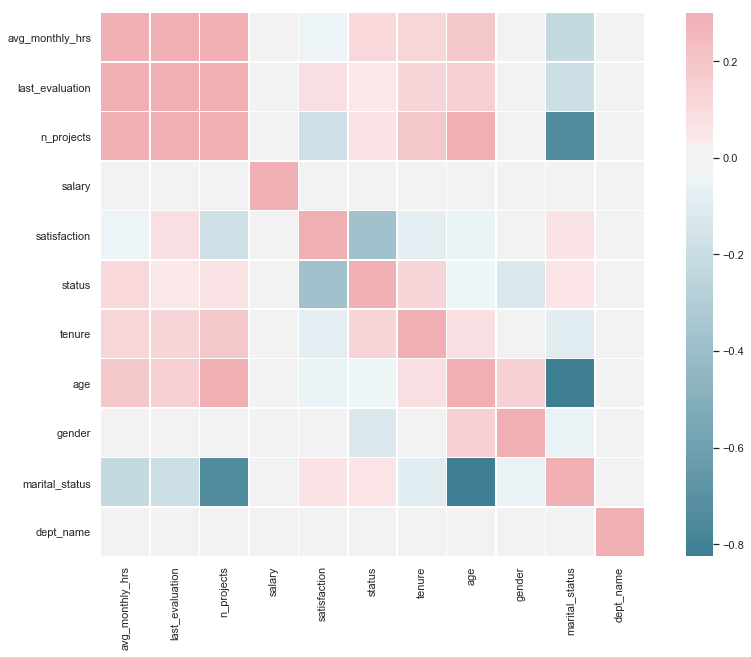

In [118]:
corr = df_copy.corr()
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

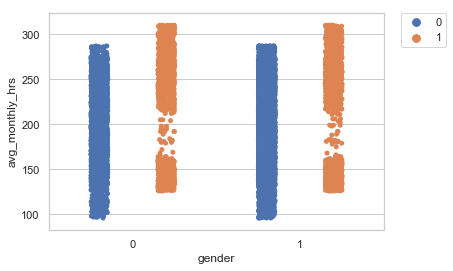

In [119]:
# stripplot
sns.stripplot(x='gender', y='avg_monthly_hrs', data=df_copy, jitter=True, hue='status', dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

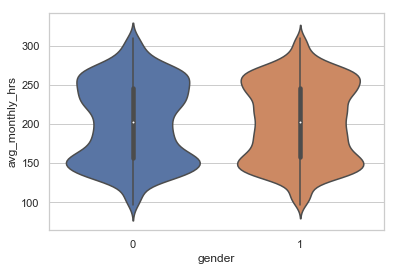

In [120]:
sns.violinplot(x='gender', y='avg_monthly_hrs', data=df_copy)

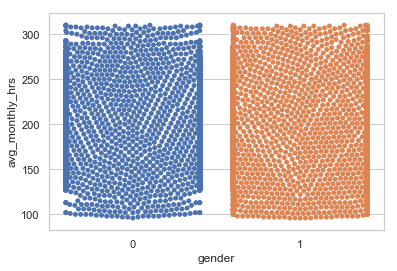

In [121]:
sns.swarmplot(x='gender', y='avg_monthly_hrs', data=df_copy)

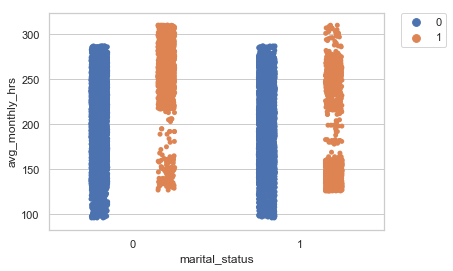

In [122]:
# stripplot
sns.stripplot(x='marital_status', y='avg_monthly_hrs', data=df_copy, jitter=True, hue='status', dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

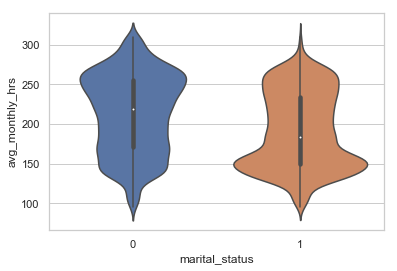

In [123]:
sns.violinplot(x='marital_status', y='avg_monthly_hrs', data=df_copy)

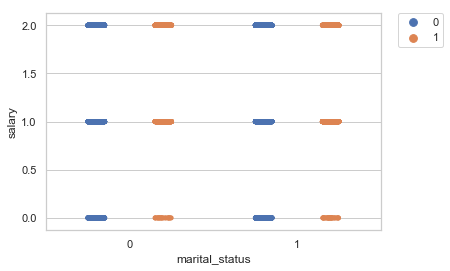

In [124]:
# stripplot
sns.stripplot(x='marital_status', y='salary', data=df_copy, jitter=True, hue='status', dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

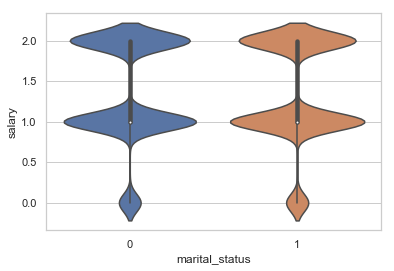

In [125]:
sns.violinplot(x='marital_status', y='salary', data=df_copy)